# Get the data

In [2]:
import numpy as np
import pandas as pd
import os


# Check content of current dir
for dirname, _, filenames in os.walk('.'):
    print(dirname)

.
.\.ipynb_checkpoints
.\Letters
.\Letters\emnist_source_files
.\License Plates
.\License Plates\annotations
.\License Plates\images
.\Size Recognition
.\__pycache__


In [3]:
testing_balanced = pd.read_csv('.\Letters\emnist-balanced-test.csv')
training_balanced = pd.read_csv('.\Letters\emnist-balanced-train.csv')
print('Balanced shape')
print(testing_balanced.shape)
print(training_balanced.shape)


Balanced shape
(18799, 785)
(112799, 785)


In [4]:
#training_letters
y_train = np.array(training_balanced.iloc[:,0].values)
X_train = np.array(training_balanced.iloc[:,1:].values)
#testing_labels
y_test = np.array(testing_balanced.iloc[:,0].values)
X_test = np.array(testing_balanced.iloc[:,1:].values)
print(y_train.shape)
print(X_train.shape)

(112799,)
(112799, 784)


# Explore the data

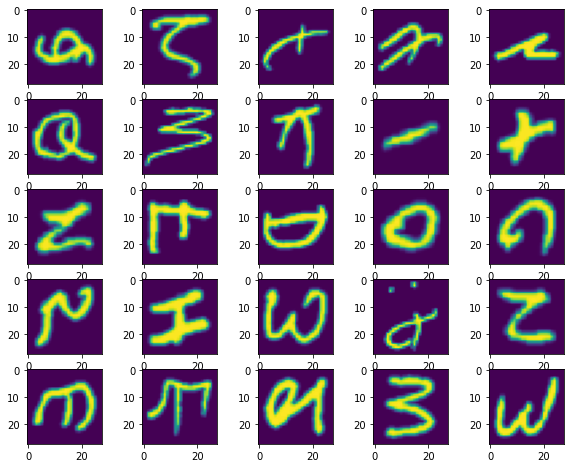

In [5]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(5,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape([28,28]))

In [6]:
pd.set_option('display.max_columns', 10)
training_balanced.head()

,45,0,0.1,0.2,0.3,...,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,...,0,0,0,0,0
1,43,0,0,0,0,...,0,0,0,0,0
2,15,0,0,0,0,...,0,0,0,0,0
3,4,0,0,0,0,...,0,0,0,0,0
4,42,0,0,0,0,...,0,0,0,0,0


## Hvad betyder vores første indblik
Ud fra ovenstående DataFrame, ses vi ikke ret meget, udover at den første kolonne indikerer hvilket bogstav/tal der er tale om. Resten af kollonnerne repræsenterer pixels i billedet 28*28 = 784 

In [7]:
training_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112799 entries, 0 to 112798
Columns: 785 entries, 45 to 0.533
dtypes: int64(785)
memory usage: 675.6 MB


## Feature Importance
Hvad med en illustraiton af hvilke features(pixels) i billedet der er vigtige.
Moddelerne der bliver arbejdet med, er indsnævret til Random Forests & K-Nearest-Neighbor. 
Random forrest kan lave en rigtigt fin illustration af hvad den forventer er vigtigt

In [8]:
from sklearn.ensemble import RandomForestClassifier
from time import time

rf_clf = RandomForestClassifier(n_estimators=400, n_jobs=-1)
print('Fitting Classifier')
t0 = time()
rf_clf.fit(X_train,y_train)
print('Classifier fitted')
print("Done in %0.3fs" % (time() - t0))

Fitting Classifier
Classifier fitted
Done in 118.996s


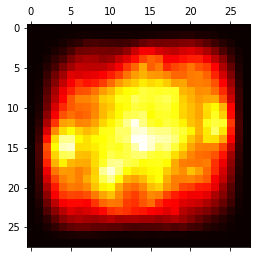

In [9]:
import matplotlib.pyplot as plt

importances = rf_clf.feature_importances_
importances = importances.reshape([28,28])

plt.matshow(importances, cmap=plt.cm.hot)
plt.show()

Ud fra ovenstående heatmap, der indikerer hvilke pixels der bruges til at predikterer vurderes der at næsten alle pixels i billedet er vigtige. Derfor vil der ikke blive sorteret fra.

## Første Prediktering
Til at se om vores model kan predikterer en enkelt ting, inden vi virkelig begynder at måle på dens præcision tager vi en nem karakter (X) og ser om vores model kan prediktere det. 

33


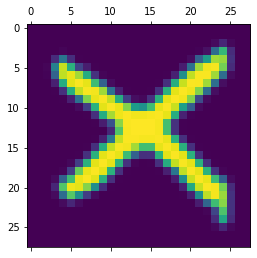

In [10]:
print(y_test[4])
plt.matshow(X_test[4].reshape([28,28]))
plt.show()

Ud fra ovenstående kan vi se at 5. objekt i y_test (labels) er 33.
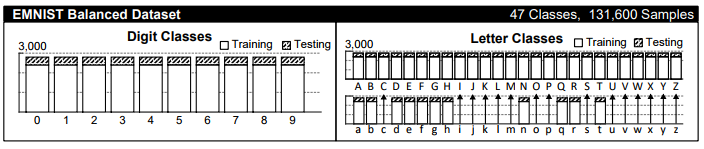
Hvis vi studere ovenstående oversigt, bør det gerne være et X, hvillket 5, element i X_test også er. Derfor bør vores model også prediktere 33 (X)

In [11]:
print(rf_clf.predict(X_test[4].reshape(1,-1)))  #Reshape = 1 ting at pred

[33]


## Performance Measures
### F1 Score

Done in 298.266s
[[1665    0    0 ...    2    0    2]
 [   0 1595    2 ...    1    7    9]
 [   0    0 1873 ...    7    4    3]
 ...
 [   2    2    5 ... 1165    8   17]
 [   1    3    0 ...    2 2222    7]
 [   0    5    2 ...    4   38 1944]]


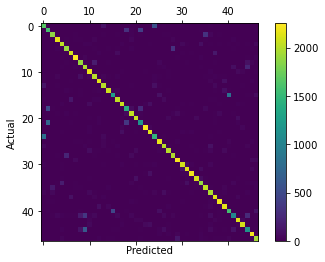

In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

t0 = time()
y_train_pred = cross_val_predict(rf_clf, X_train, y_train, cv=3)
print("Done in %0.3fs" % (time() - t0))

cm = confusion_matrix(y_train, y_train_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

[[1665    0    0 ...    2    0    2]
 [   0 1595    2 ...    1    7    9]
 [   0    0 1873 ...    7    4    3]
 ...
 [   2    2    5 ... 1165    8   17]
 [   1    3    0 ...    2 2222    7]
 [   0    5    2 ...    4   38 1944]]


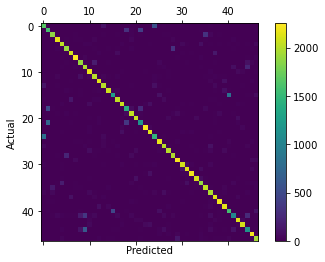

In [13]:
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
from sklearn.metrics import f1_score

print(f1_score(y_train, y_train_pred, average='macro'))
print(f1_score(y_train, y_train_pred, average='micro'))
print(f1_score(y_train, y_train_pred, average='weighted'))
8
print(len(f1_score(y_train, y_train_pred, average=None)))

0.8078529376511637
0.8097412211101163
0.8078521596861765
[0.64360263 0.59626168 0.81470204 0.9135283  0.83631872 0.81874866
 0.86563467 0.9311272  0.79241351 0.71998543 0.85629921 0.83106154
 0.88985328 0.8384808  0.88879347 0.58973764 0.86204704 0.87325729
 0.60991986 0.84128289 0.86420788 0.52050473 0.92250618 0.87349766
 0.6283035  0.87422267 0.83879041 0.85659247 0.8194617  0.89862125
 0.87120897 0.88479835 0.92220591 0.90451613 0.81112299 0.82863517
 0.79373368 0.86801619 0.90319934 0.87787035 0.63155787 0.55438781
 0.8763815  0.89133192 0.5376096  0.89560661 0.80714137]
47


# Lad os prøve en ny model
## K-NN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier(n_neighbors=3)
t0 = time()
kn_clf.fit(X_train, y_train)
print("Done in %0.3fs" % (time() - t0))

Done in 109.225s


Lad os foretage same predictering som i forrige model.

33


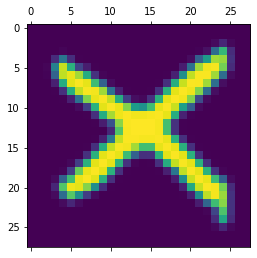

In [19]:
print(y_test[4])
plt.matshow(X_test[4].reshape([28,28]))
plt.show()

Ud fra ovenstående kan vi se at 5. objekt i y_test (labels) er 33.
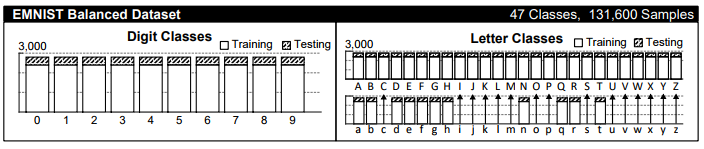
Hvis vi studere ovenstående oversigt, bør det gerne være et X, hvillket 5, element i X_test også er. Derfor bør vores model også prediktere 33 (X)

In [20]:
print(kn_clf.predict(X_test[4].reshape(1,-1)))  #Reshape = 1 ting at pred

[33]


Lad os foretage den samme performance måling som forrige model 

In [21]:
t0 = time()
y_train_pred = cross_val_predict(kn_clf, X_train, y_train, cv=3)
print("Done in %0.3fs" % (time() - t0))

Done in 13006.561s


In [22]:
from sklearn.metrics import f1_score

print(f1_score(y_train, y_train_pred, average='macro'))
print(f1_score(y_train, y_train_pred, average='micro'))
print(f1_score(y_train, y_train_pred, average='weighted'))
print(f1_score(y_train, y_train_pred, average=None))
print(len(f1_score(y_train, y_train_pred, average=None)))

0.7675603667854071
0.7669748845291183
0.7675593835886779
[0.51546392 0.47191011 0.78970496 0.86839577 0.79435724 0.77818182
 0.84049441 0.89001758 0.80693785 0.60899535 0.84028777 0.76587587
 0.82350753 0.80813044 0.86708723 0.53681307 0.8389126  0.85672697
 0.52213677 0.82207819 0.84043258 0.44581788 0.93307593 0.87686718
 0.57838778 0.82384052 0.71259147 0.81210415 0.80776853 0.87450515
 0.85720173 0.85326412 0.92327984 0.89766211 0.73782431 0.8257384
 0.77810651 0.8544641  0.91393887 0.86860418 0.54910815 0.44809052
 0.86491976 0.88413621 0.43072212 0.87846397 0.7584057 ]
47


from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict

#model_1 = RandomForestClassifier(n_estimators=100, n_jobs=-1)
#model_2 = RandomForestClassifier(n_estimators=200, n_jobs=-1)
#model_3 = RandomForestClassifier(n_estimators=300, n_jobs=-1)
model_4 = RandomForestClassifier(n_estimators=400, n_jobs=-1)
#model_5 = RandomForestClassifier(n_estimators=500, n_jobs=-1)

t0 = time()
y_1_pred = cross_val_predict(model_1, X_train, y_train, cv=3)
print("Done in %0.3fs" % (time() - t0))



print(f1_score(y_train, y_1_pred, average='macro'))
print(f1_score(y_train, y_1_pred, average='micro'))
print(f1_score(y_train, y_1_pred, average='weighted'))
print(f1_score(y_train, y_1_pred, average=None))
print(len(f1_score(y_train, y_1_pred, average=None)))

t0 = time()
y_2_pred = cross_val_predict(model_2, X_train, y_train, cv=3)
print("Done in %0.3fs" % (time() - t0))

from sklearn.metrics import f1_score

print(f1_score(y_train, y_2_pred, average='macro'))
print(f1_score(y_train, y_2_pred, average='micro'))
print(f1_score(y_train, y_2_pred, average='weighted'))
print(f1_score(y_train, y_2_pred, average=None))
print(len(f1_score(y_train, y_2_pred, average=None)))

t0 = time()
y_3_pred = cross_val_predict(model_3, X_train, y_train, cv=3)
print("Done in %0.3fs" % (time() - t0))

from sklearn.metrics import f1_score

print(f1_score(y_train, y_3_pred, average='macro'))
print(f1_score(y_train, y_3_pred, average='micro'))
print(f1_score(y_train, y_3_pred, average='weighted'))
print(f1_score(y_train, y_3_pred, average=None))
print(len(f1_score(y_train, y_3_pred, average=None)))

t0 = time()
y_4_pred = cross_val_predict(model_4, X_train, y_train, cv=3)
print("Done in %0.3fs" % (time() - t0))

from sklearn.metrics import f1_score

print(f1_score(y_train, y_4_pred, average='macro'))
print(f1_score(y_train, y_4_pred, average='micro'))
print(f1_score(y_train, y_4_pred, average='weighted'))
print(f1_score(y_train, y_4_pred, average=None))
print(len(f1_score(y_train, y_4_pred, average=None)))

t0 = time()
y_5_pred = cross_val_predict(model_5, X_train, y_train, cv=3)
print("Done in %0.3fs" % (time() - t0))

from sklearn.metrics import f1_score

print(f1_score(y_train, y_5_pred, average='macro'))
print(f1_score(y_train, y_5_pred, average='micro'))
print(f1_score(y_train, y_5_pred, average='weighted'))
print(f1_score(y_train, y_5_pred, average=None))
print(len(f1_score(y_train, y_5_pred, average=None)))

In [23]:
import joblib

rf_clf.fit(X_train, y_train)

filename = 'model_licenseplate_test.sav'
joblib.dump(rf_clf, filename)

['model_licenseplate_test.sav']

2


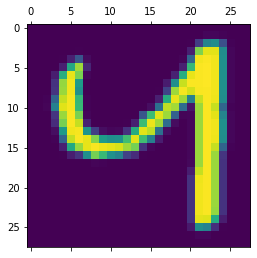

2


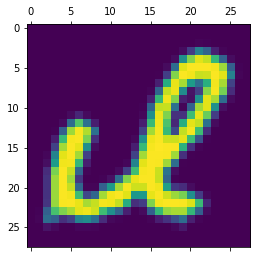

2


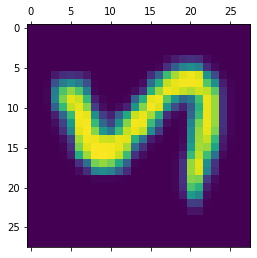

2


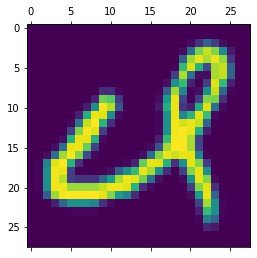

2


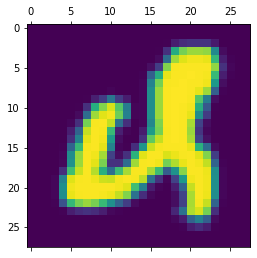

2


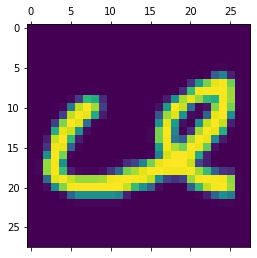

2


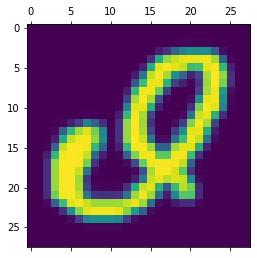

2


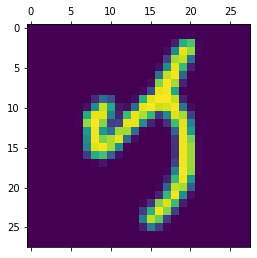

2


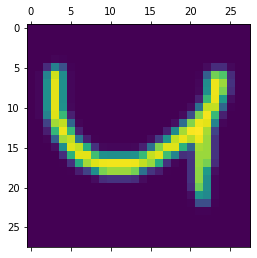

2


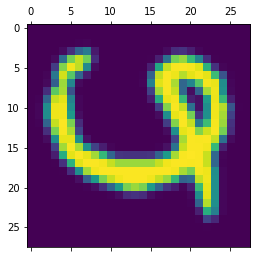

2


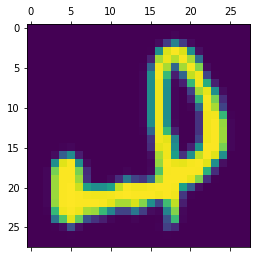

2


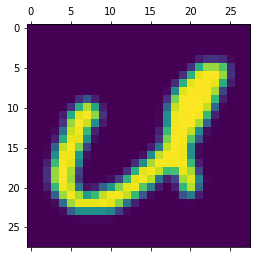

2


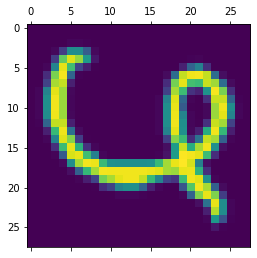

2


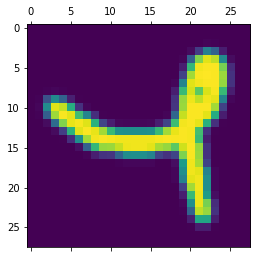

2


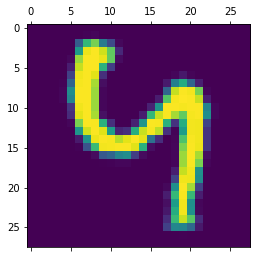

2


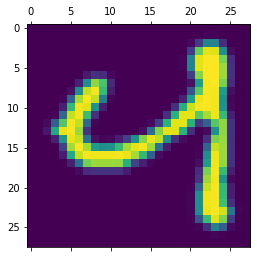

2


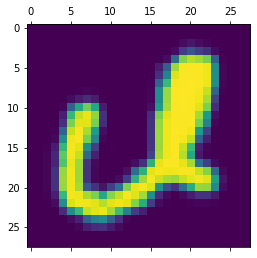

2


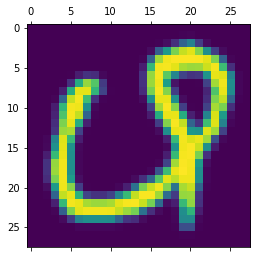

2


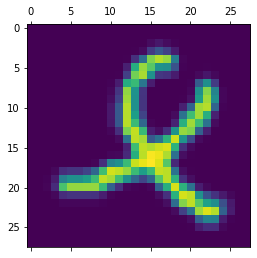

2


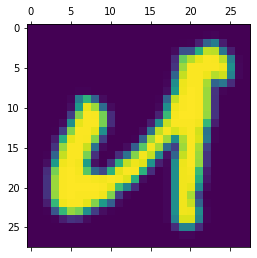

2


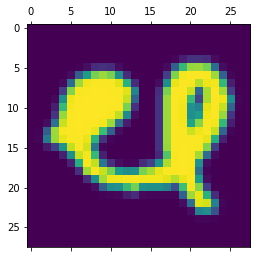

2


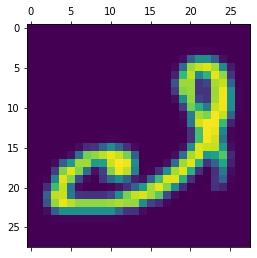

2


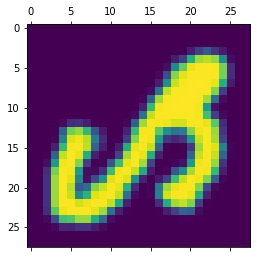

2


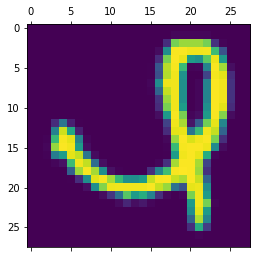

2


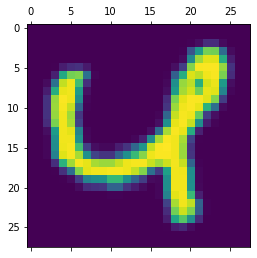

2


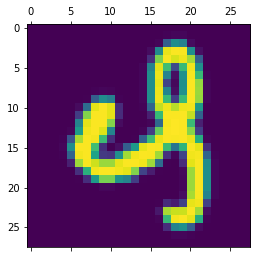

2


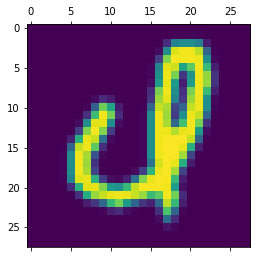

2


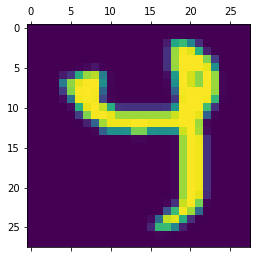

2


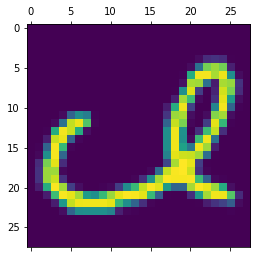

2


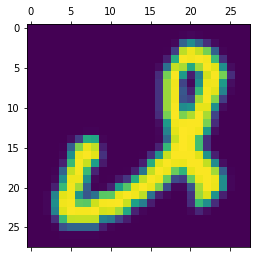

2


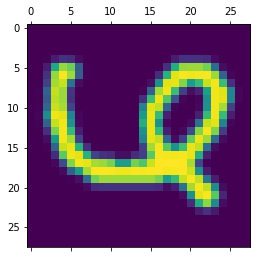

2


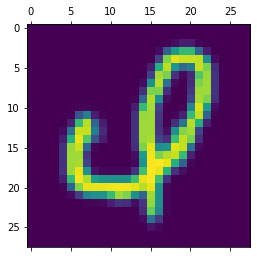

2


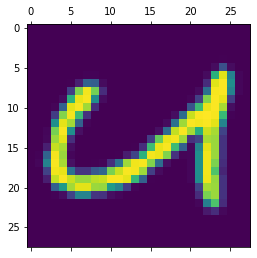

2


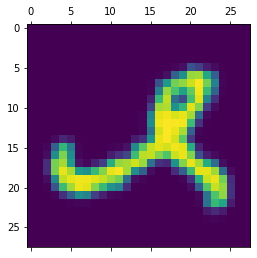

2


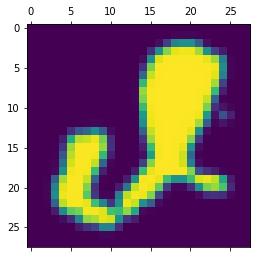

2


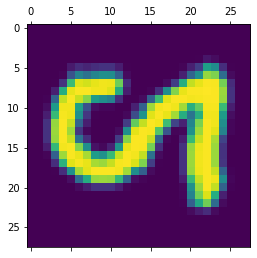

2


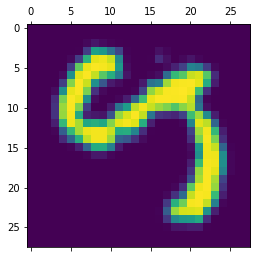

2


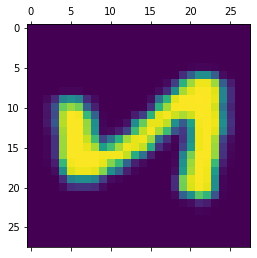

2


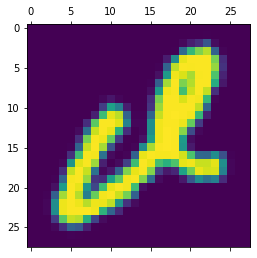

2


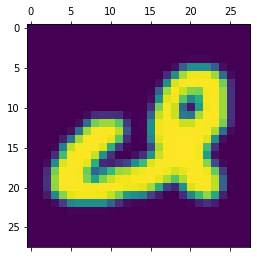

2


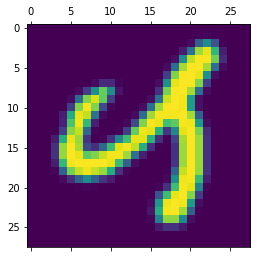

2


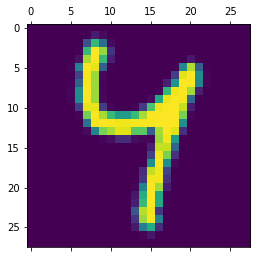

2


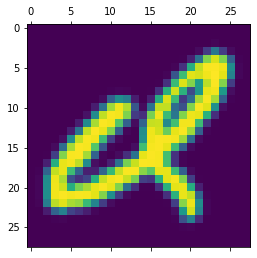

2


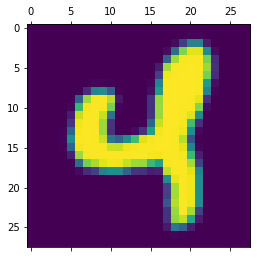

2


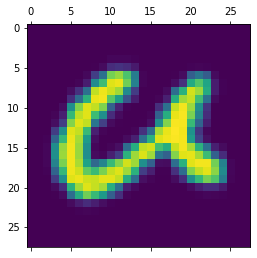

2


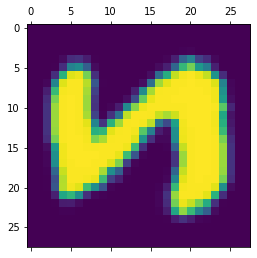

2


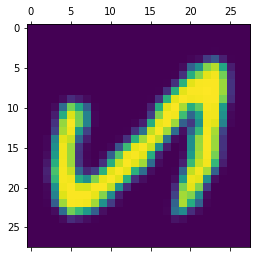

2


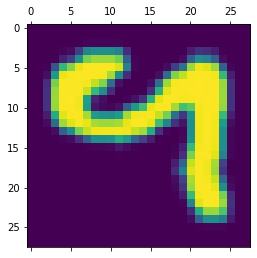

2


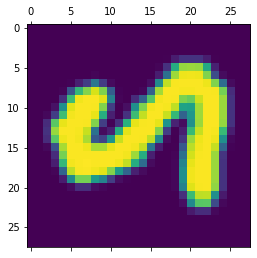

2


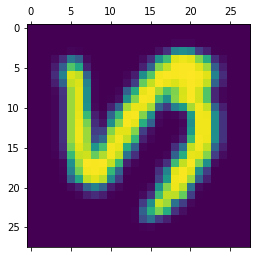

2


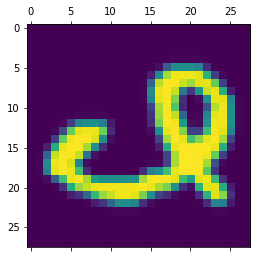

2


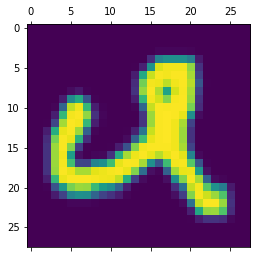

2


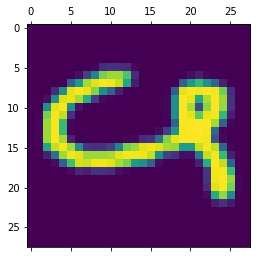

2


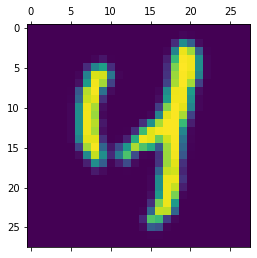

2


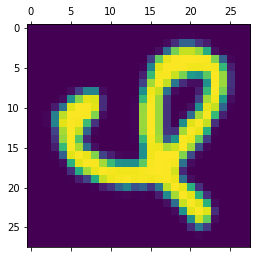

2


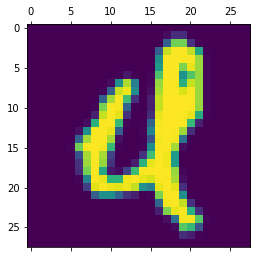

2


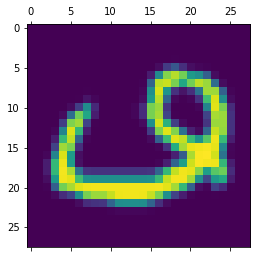

2


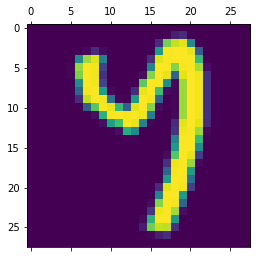

2


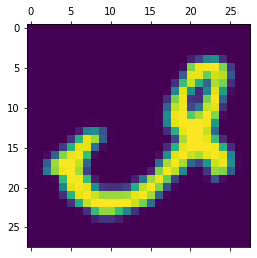

2


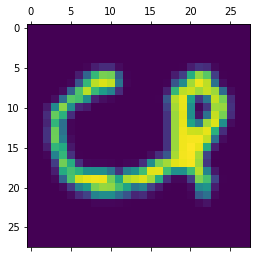

2


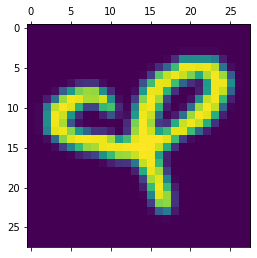

2


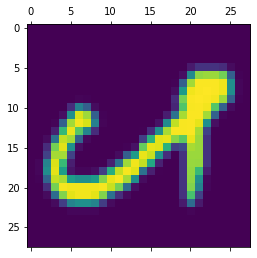

2


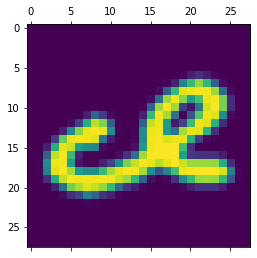

2


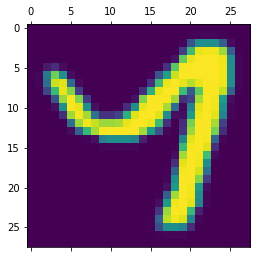

2


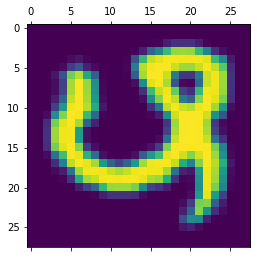

2


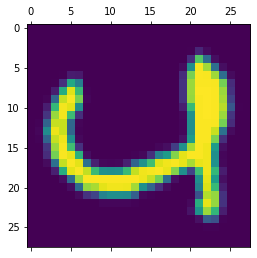

2


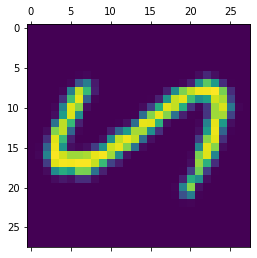

2


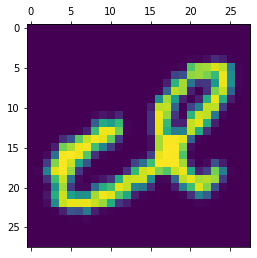

2


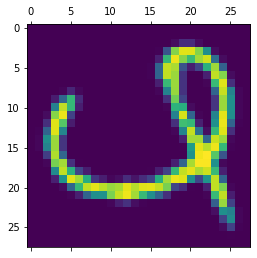

2


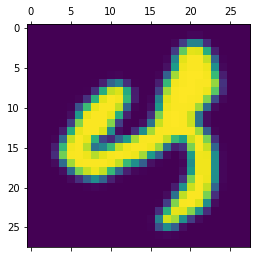

2


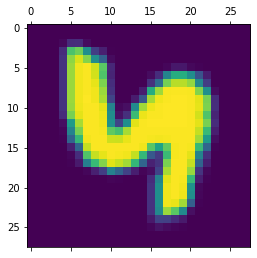

2


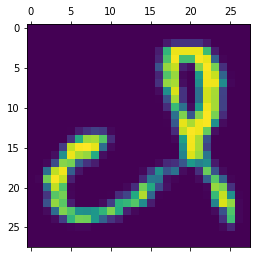

2


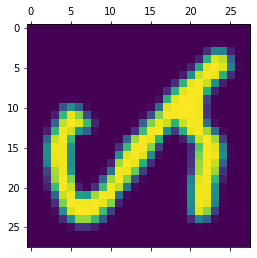

2


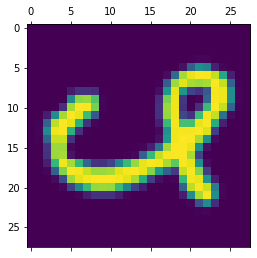

2


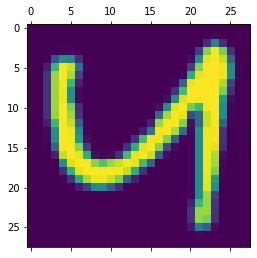

2


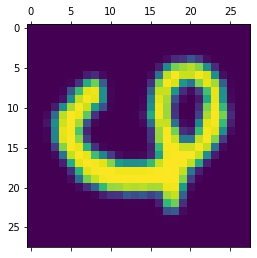

2


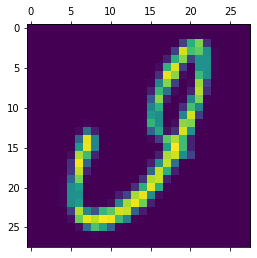

2


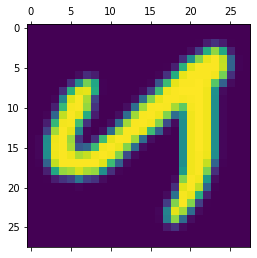

2


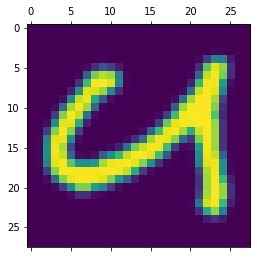

2


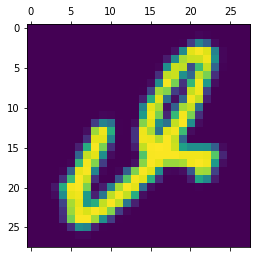

2


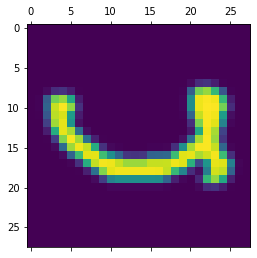

2


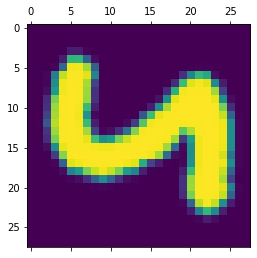

2


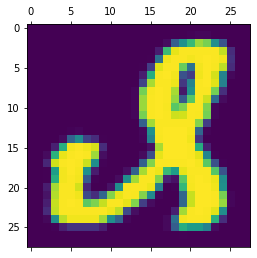

2


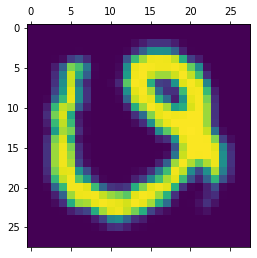

2


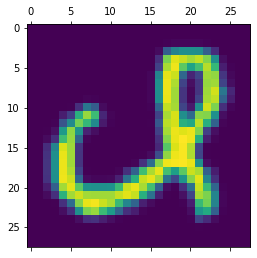

2


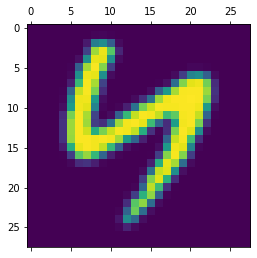

2


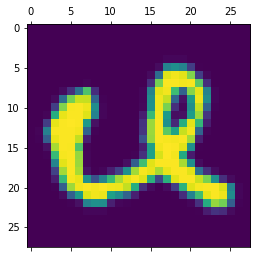

2


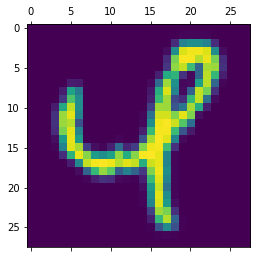

2


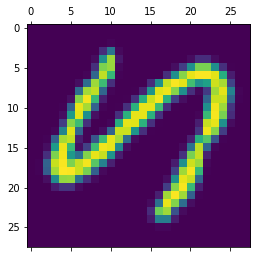

2


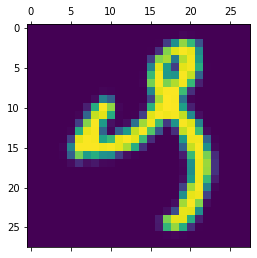

2


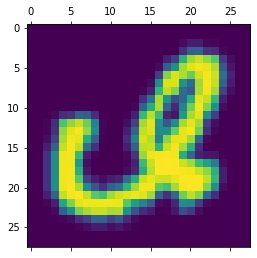

2


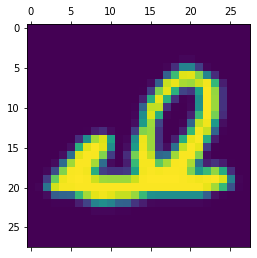

2


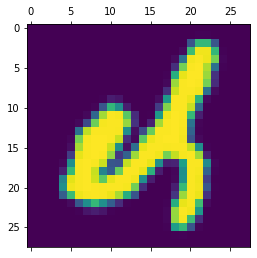

2


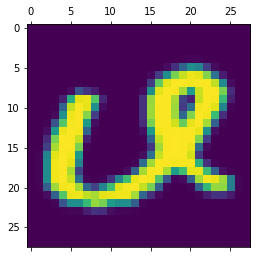

2


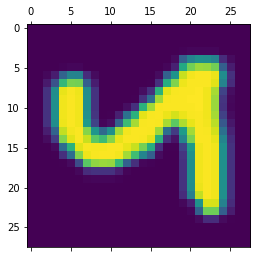

2


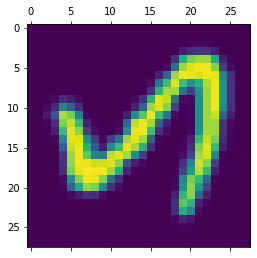

2


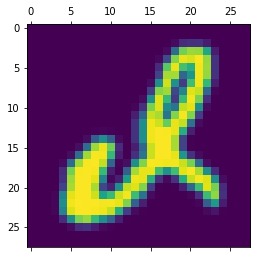

2


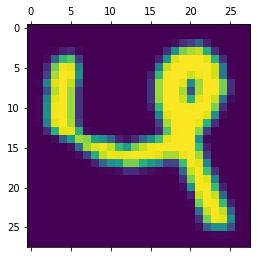

2


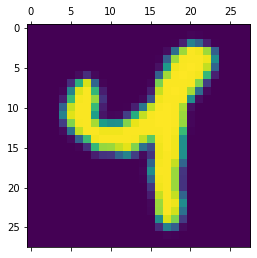

2


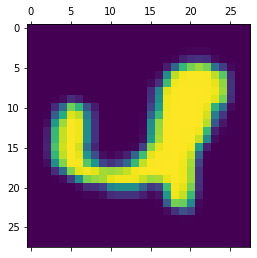

2


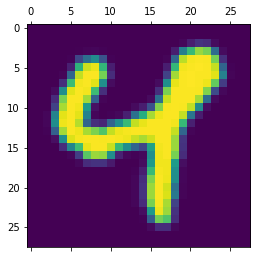

2


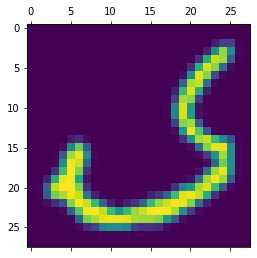

2


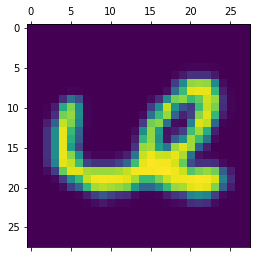

2


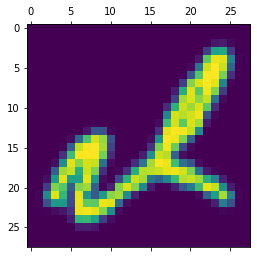

2


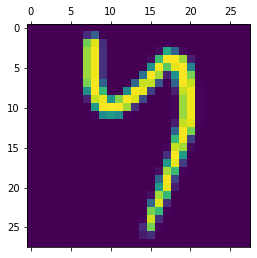

2


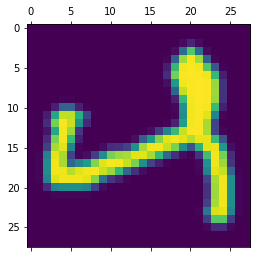

2


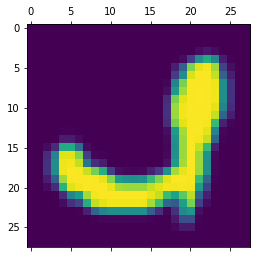

2


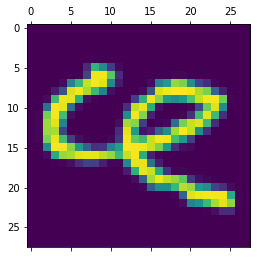

2


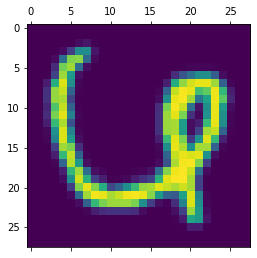

2


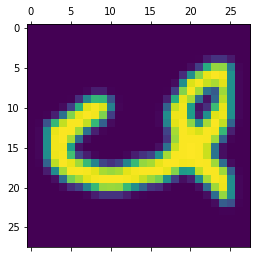

2


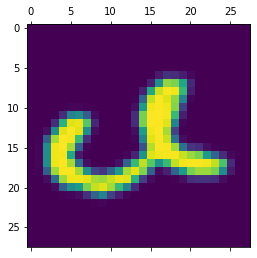

2


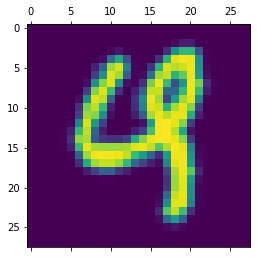

2


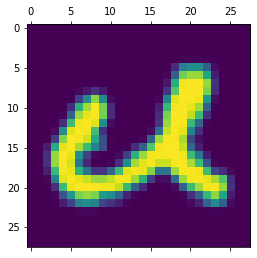

2


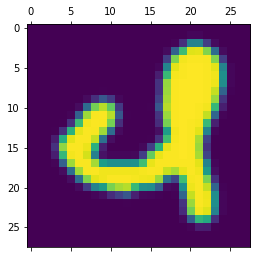

2


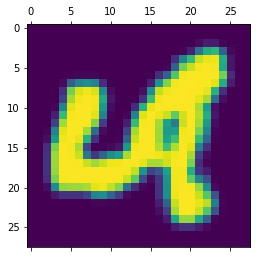

2


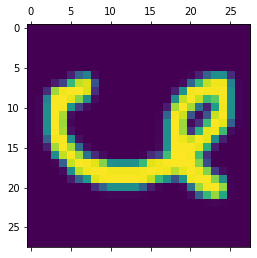

2


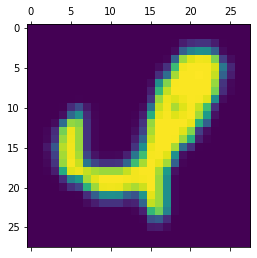

2


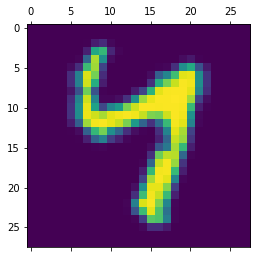

2


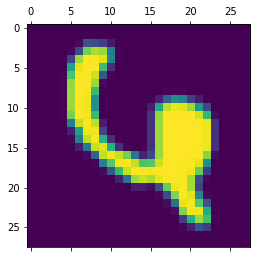

2


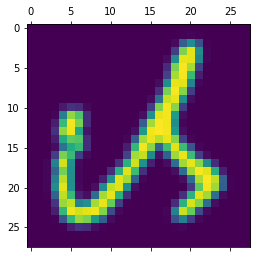

2


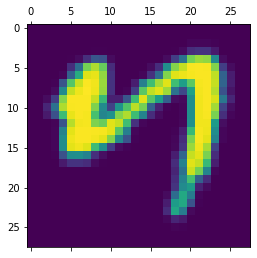

2


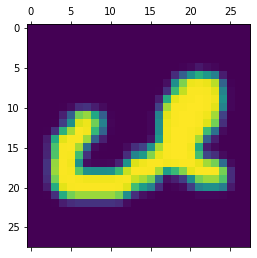

2


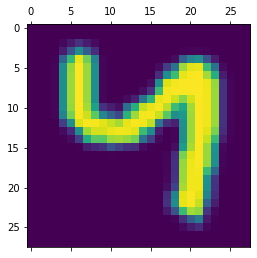

2


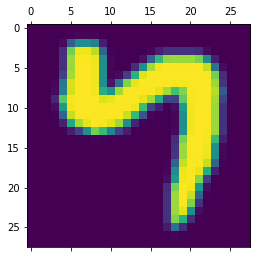

2


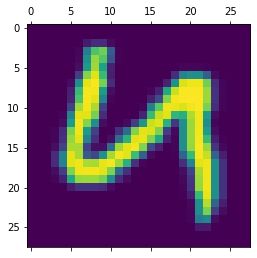

2


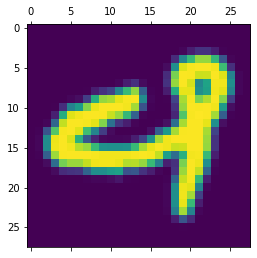

2


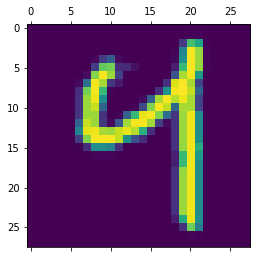

2


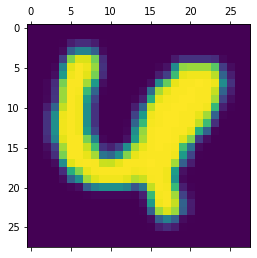

2


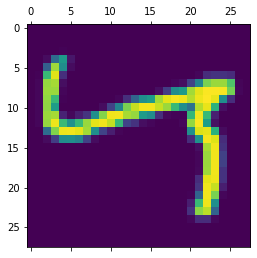

2


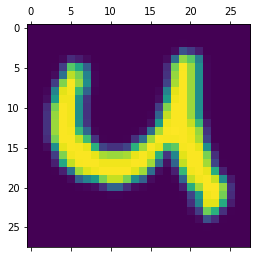

2


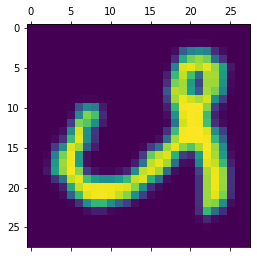

2


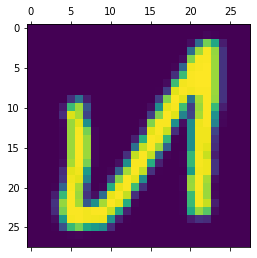

2


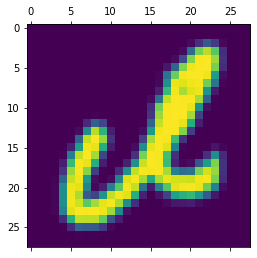

2


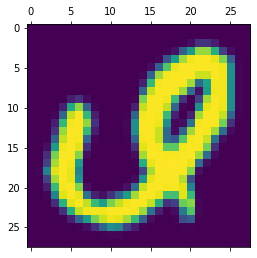

2


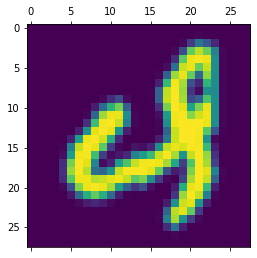

2


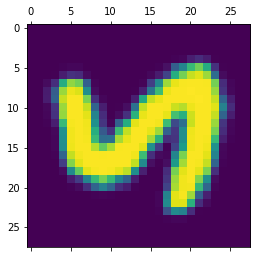

2


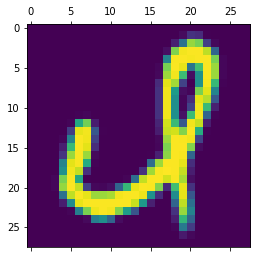

2


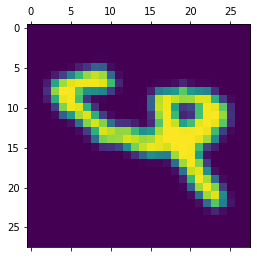

2


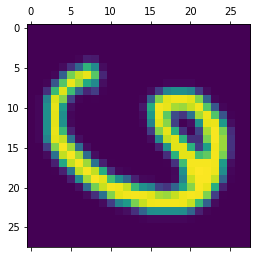

2


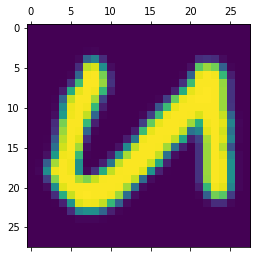

2


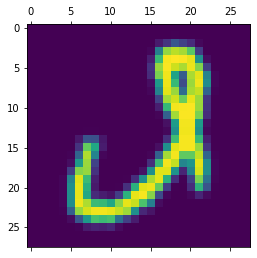

2


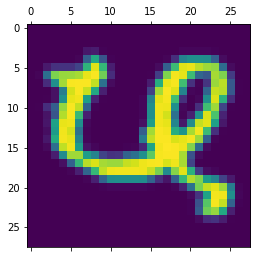

2


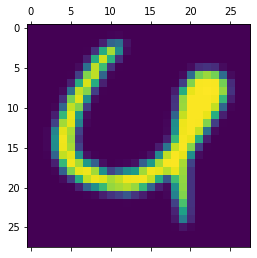

2


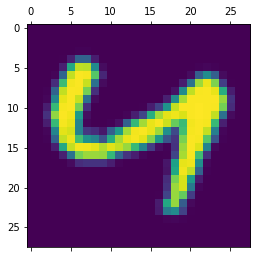

2


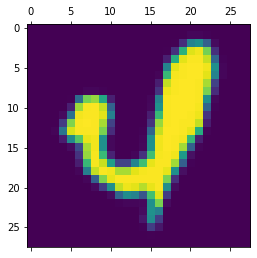

2


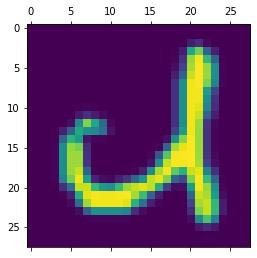

2


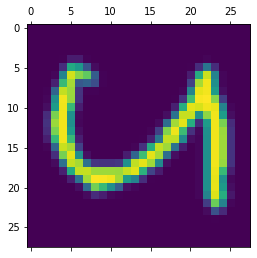

2


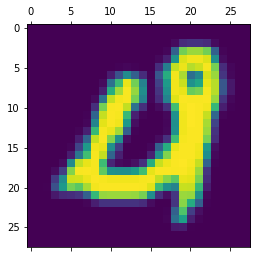

2


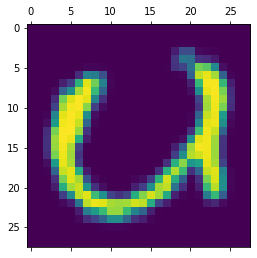

2


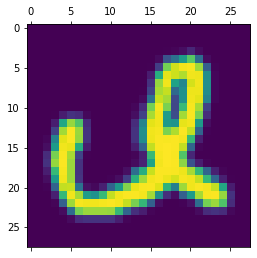

2


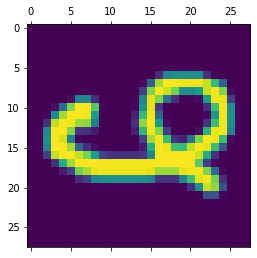

2


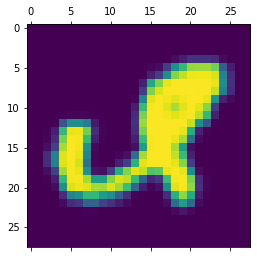

2


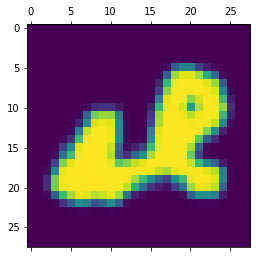

2


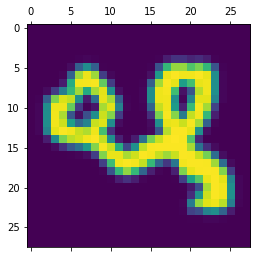

2


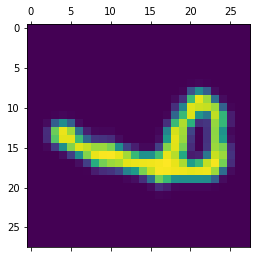

2


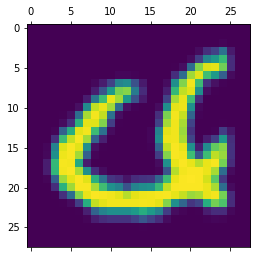

2


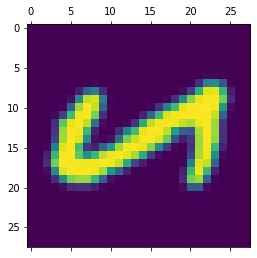

2


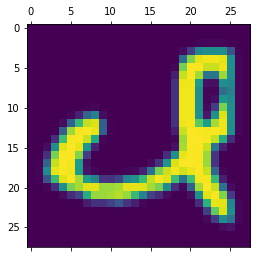

2


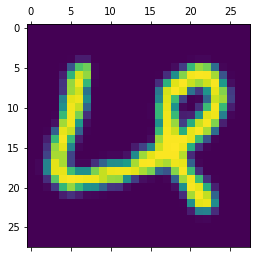

2


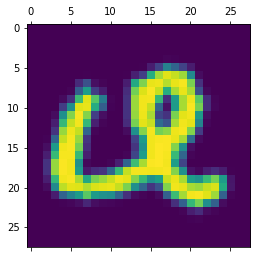

2


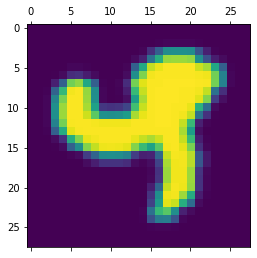

2


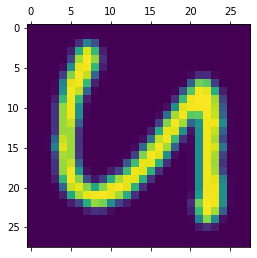

2


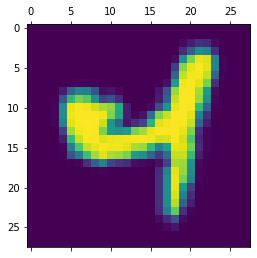

2


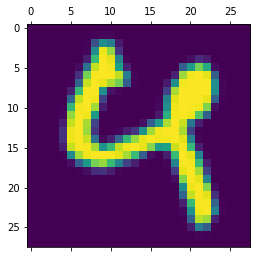

2


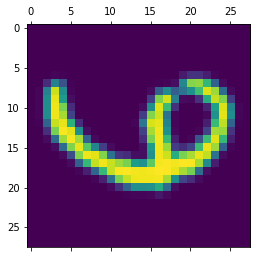

2


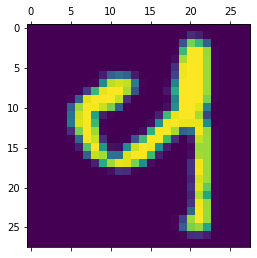

2


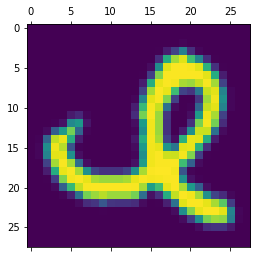

2


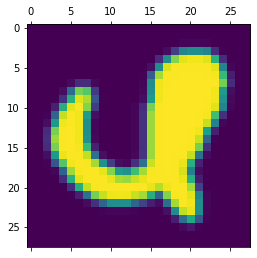

2


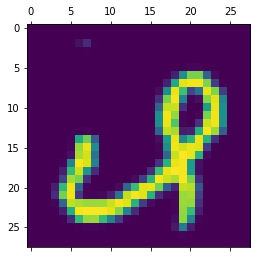

2


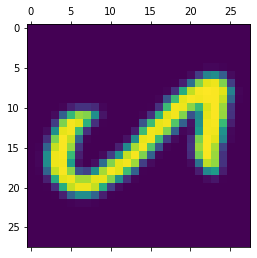

2


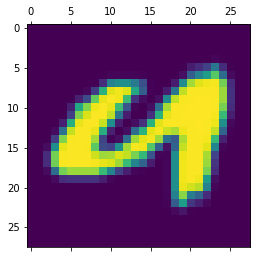

2


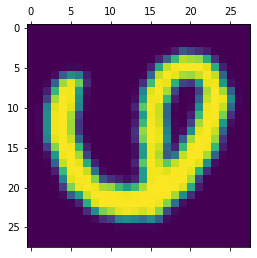

2


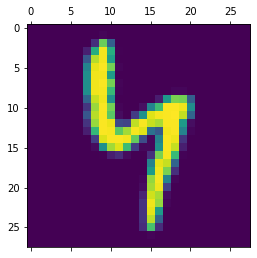

2


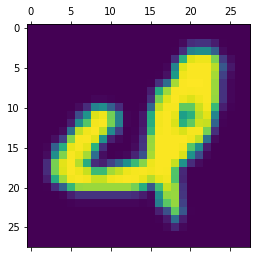

2


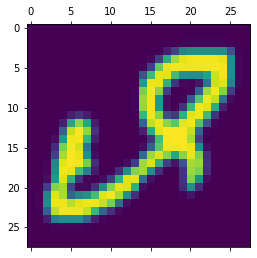

2


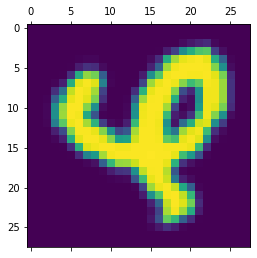

2


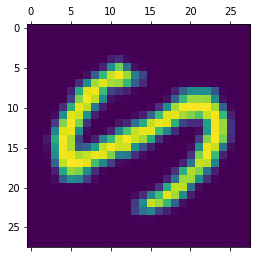

2


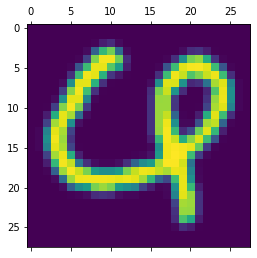

2


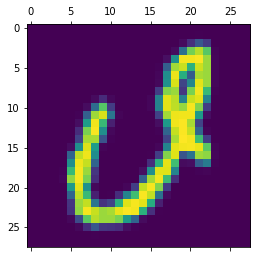

2


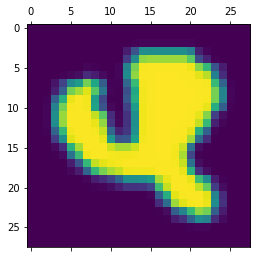

2


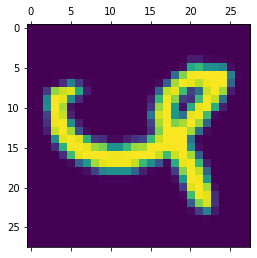

2


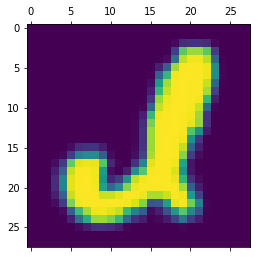

2


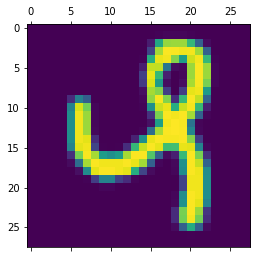

2


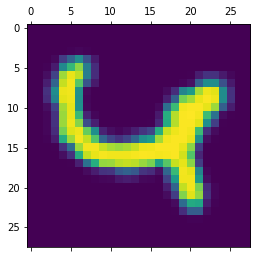

2


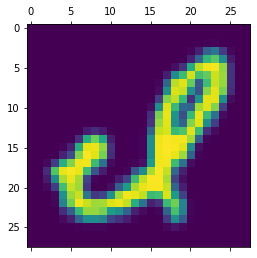

2


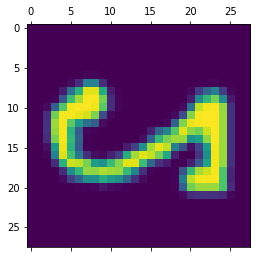

2


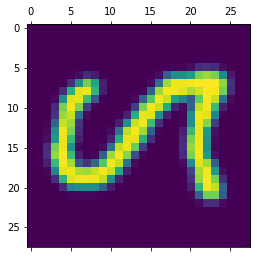

2


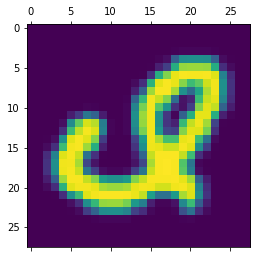

2


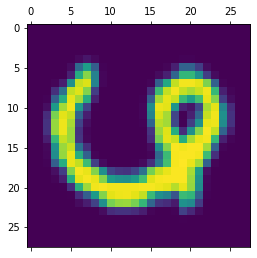

2


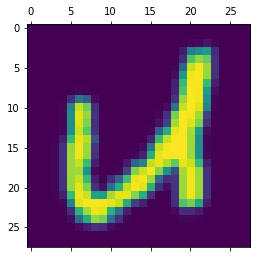

2


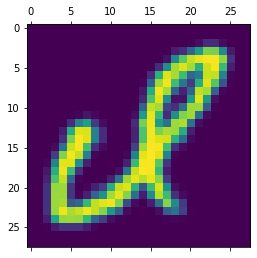

2


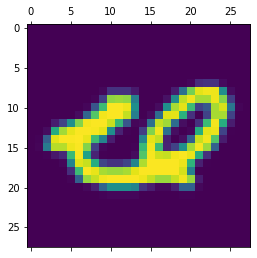

2


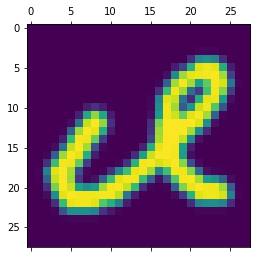

2


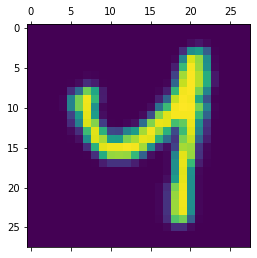

2


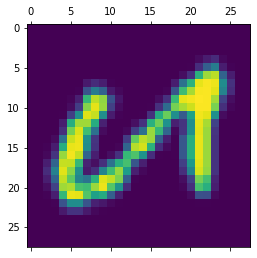

2


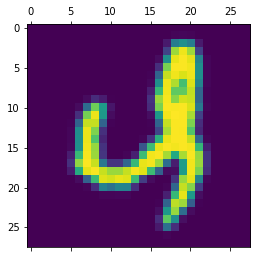

2


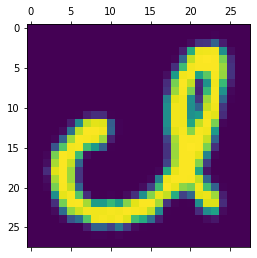

2


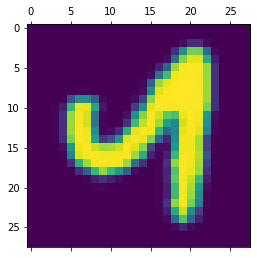

2


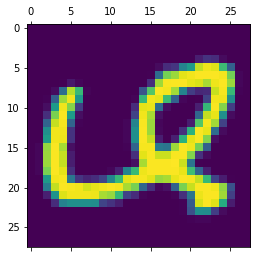

2


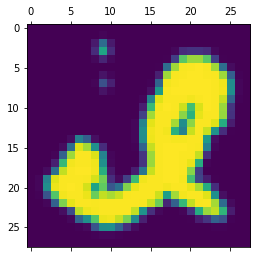

2


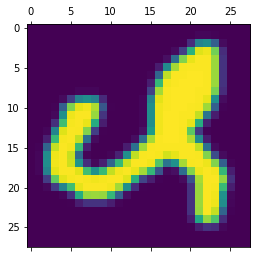

2


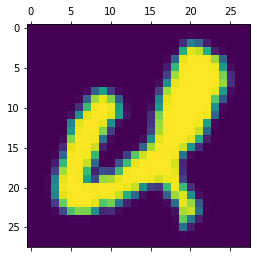

2


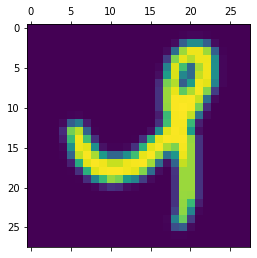

2


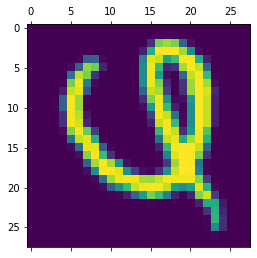

2


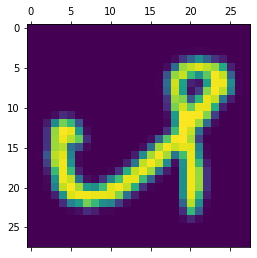

2


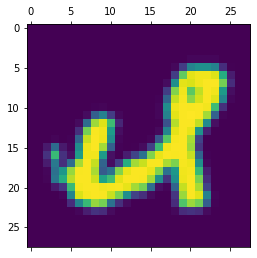

2


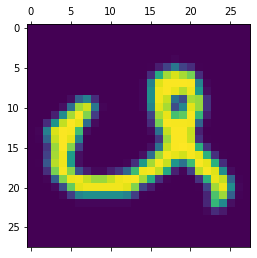

2


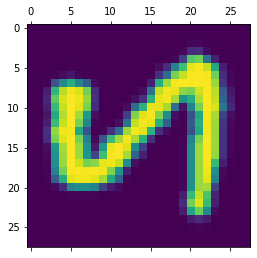

2


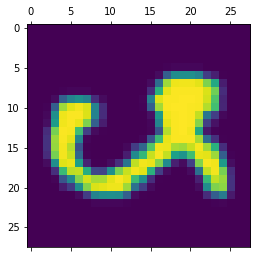

2


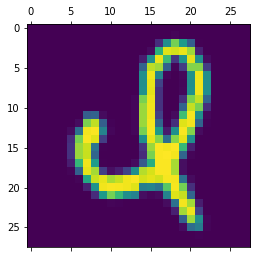

2


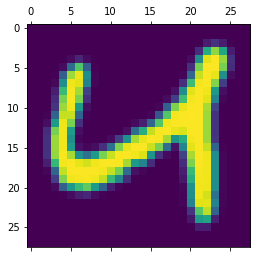

2


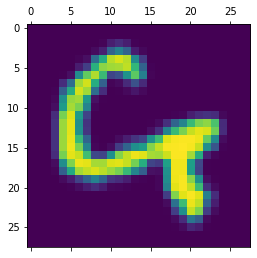

2


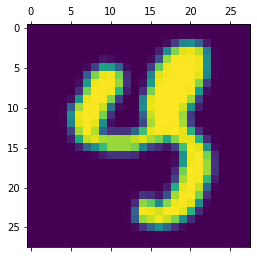

2


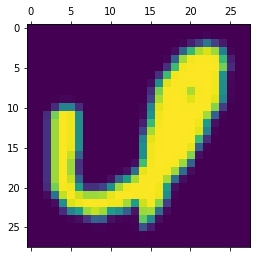

2


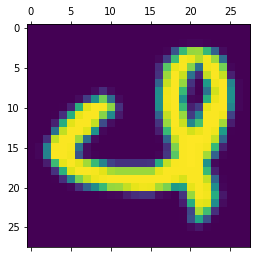

2


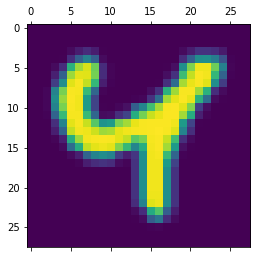

2


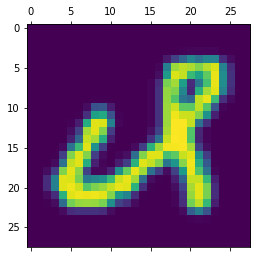

2


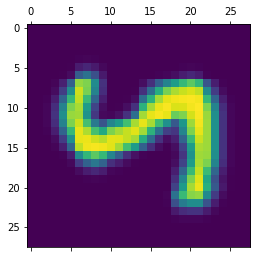

2


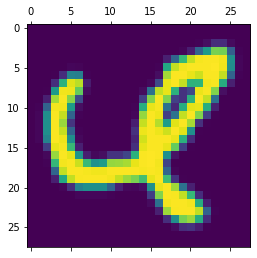

2


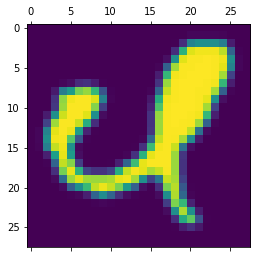

2


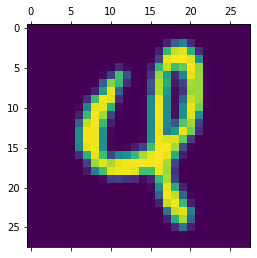

2


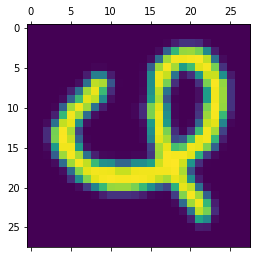

2


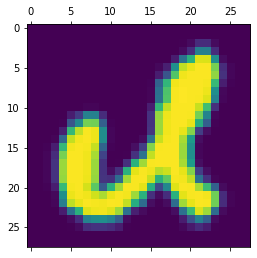

2


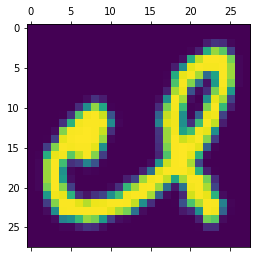

2


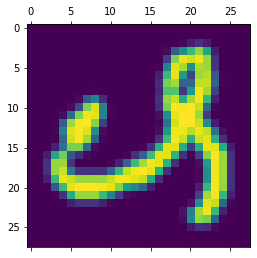

2


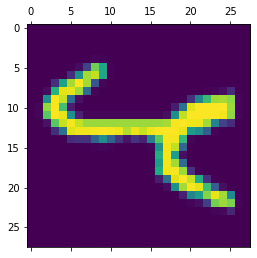

2


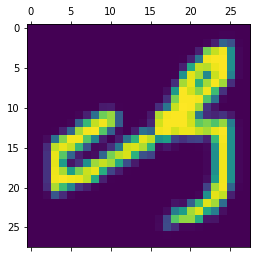

2


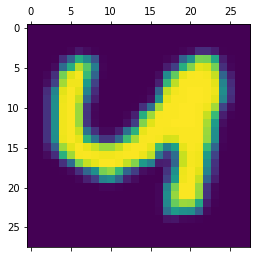

2


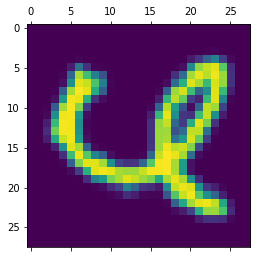

2


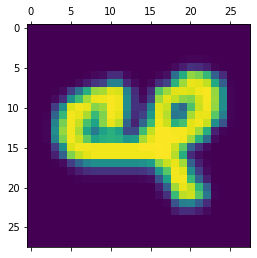

2


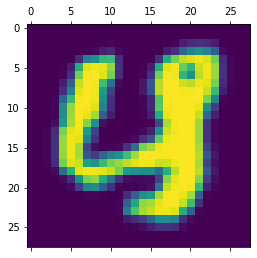

2


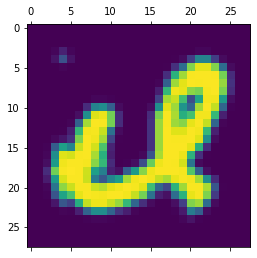

2


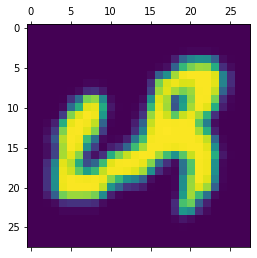

2


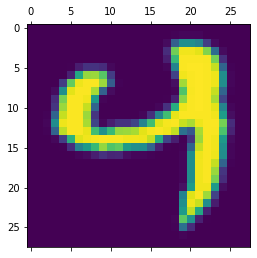

2


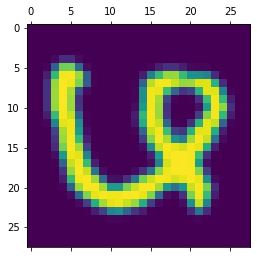

2


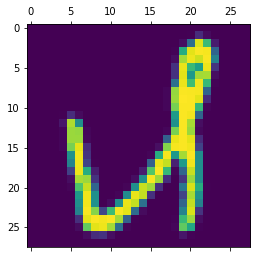

2


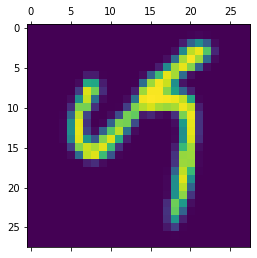

2


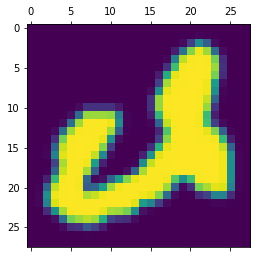

2


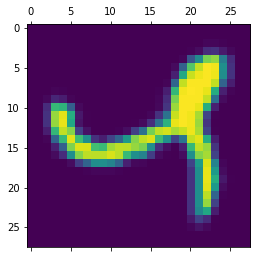

2


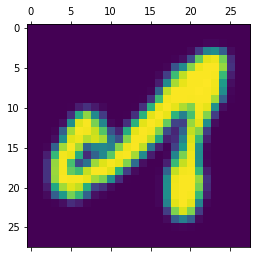

2


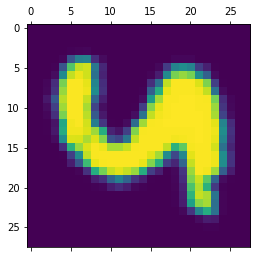

2


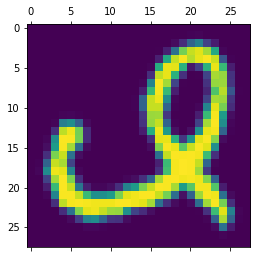

2


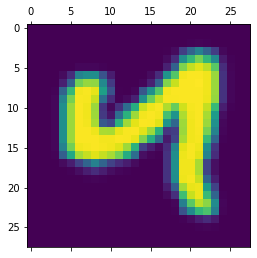

2


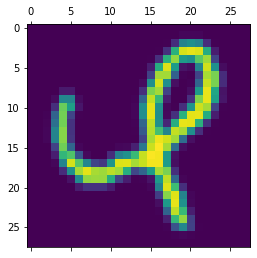

2


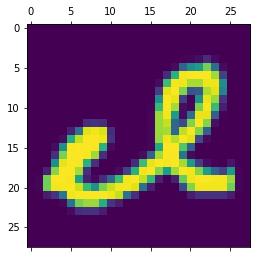

2


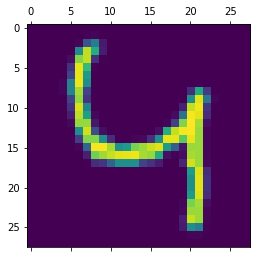

2


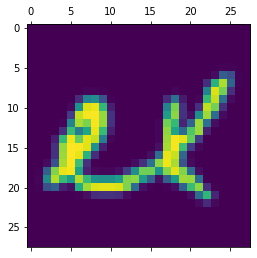

2


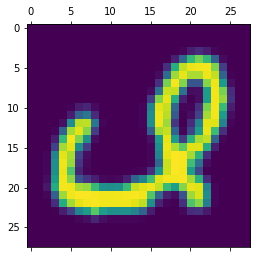

2


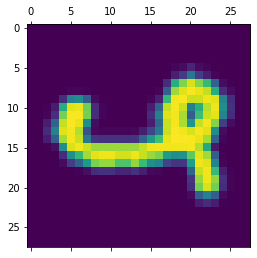

2


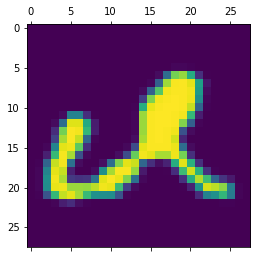

2


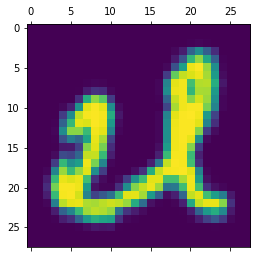

2


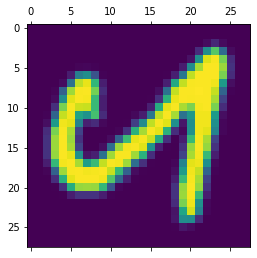

2


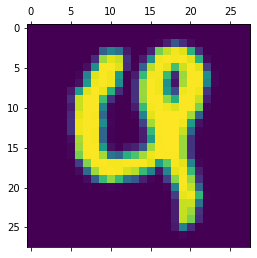

2


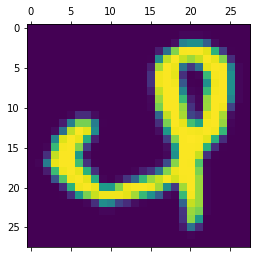

2


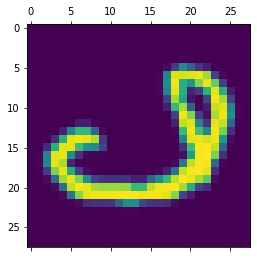

2


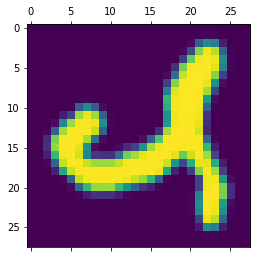

2


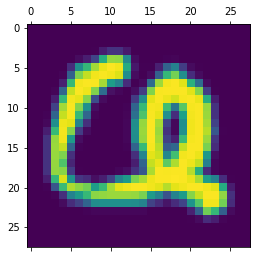

2


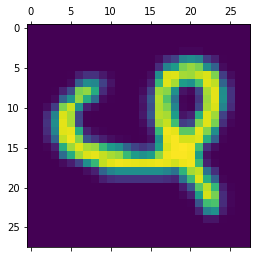

2


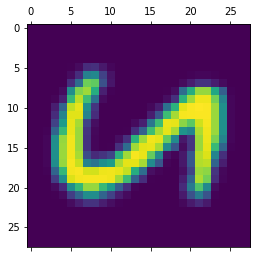

2


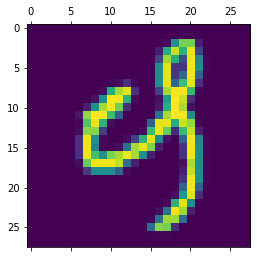

2


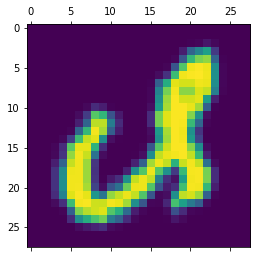

2


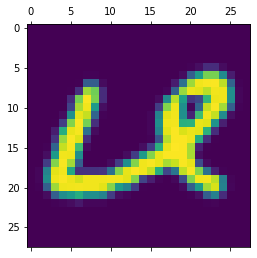

2


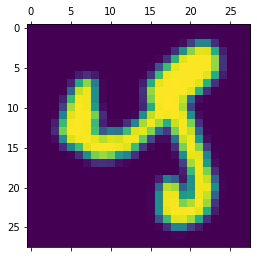

2


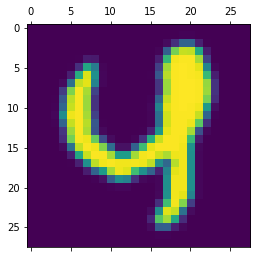

2


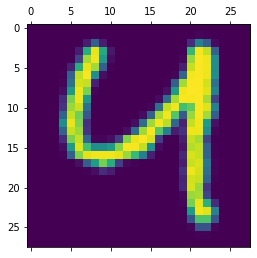

2


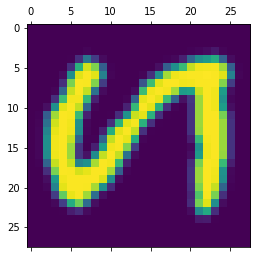

2


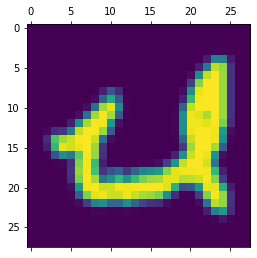

2


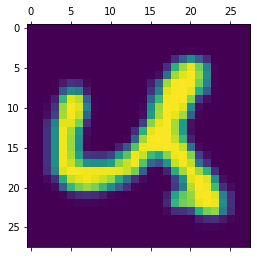

2


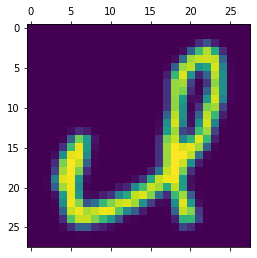

2


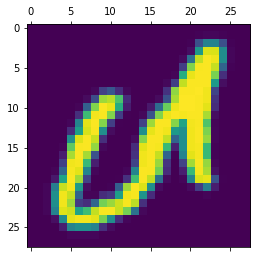

2


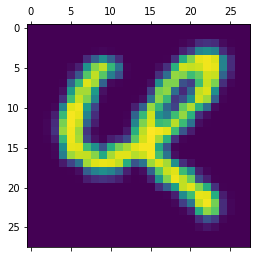

2


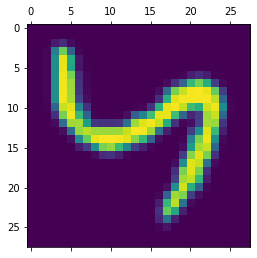

2


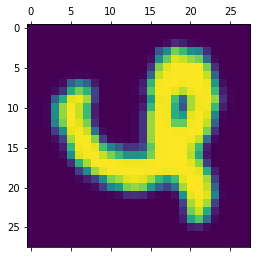

2


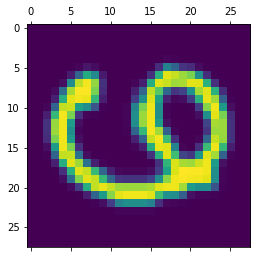

2


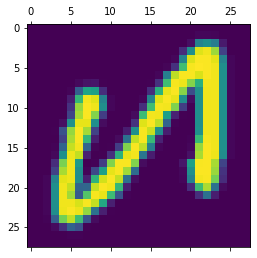

2


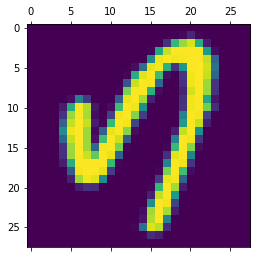

2


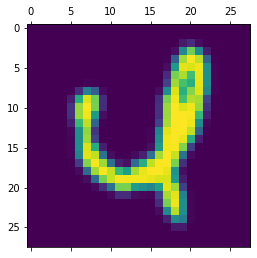

2


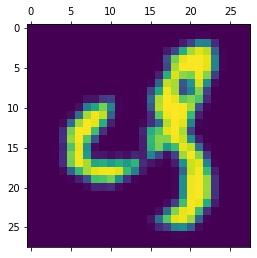

2


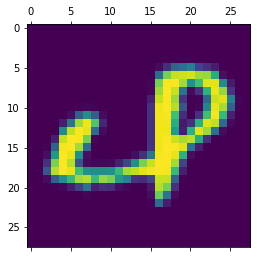

2


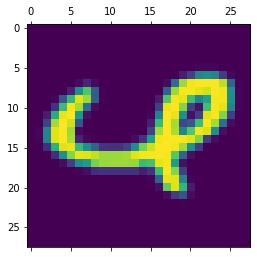

2


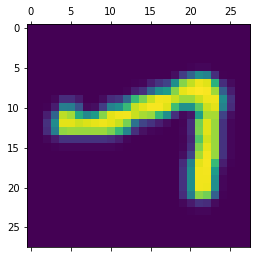

2


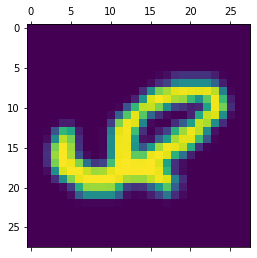

2


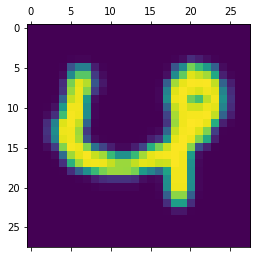

2


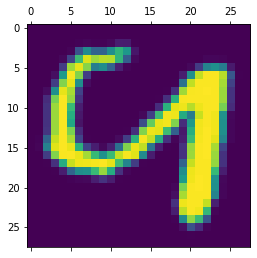

2


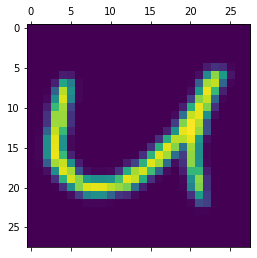

2


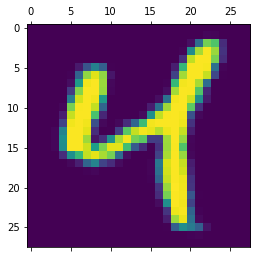

2


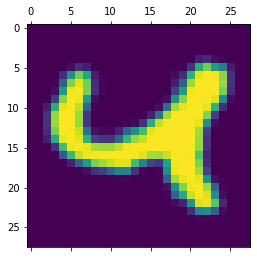

2


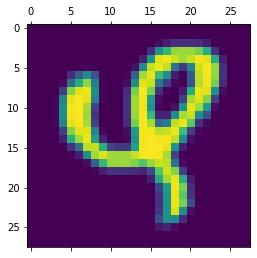

2


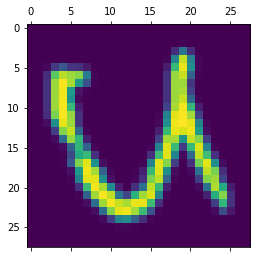

2


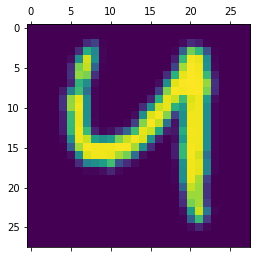

2


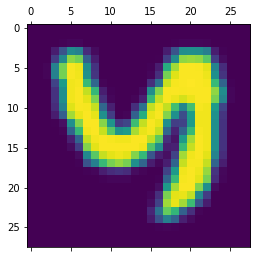

2


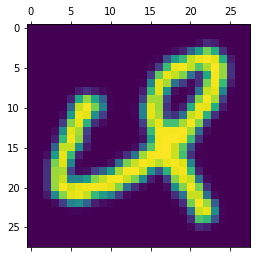

2


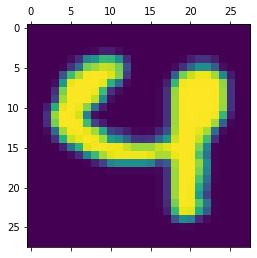

2


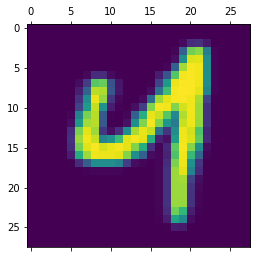

2


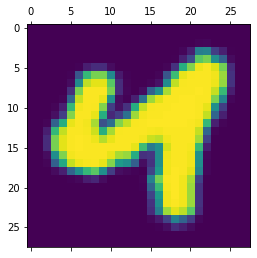

2


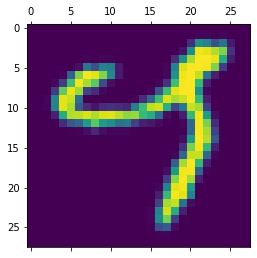

2


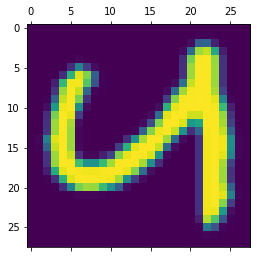

2


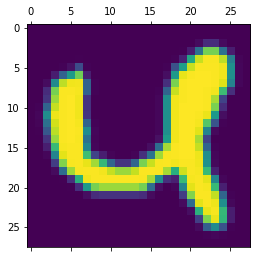

2


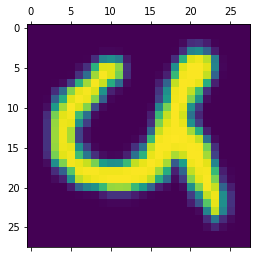

2


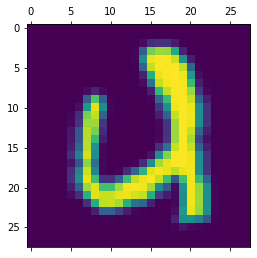

2


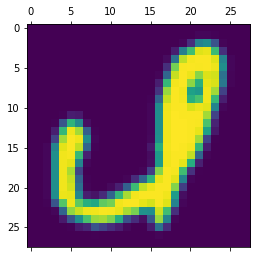

2


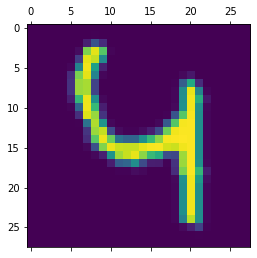

2


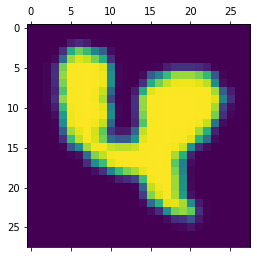

2


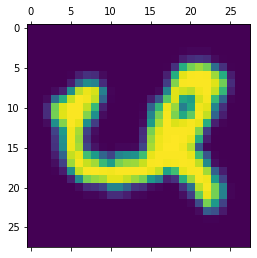

2


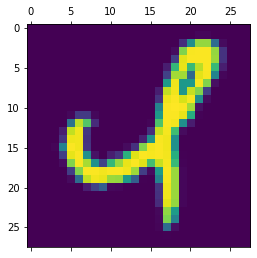

2


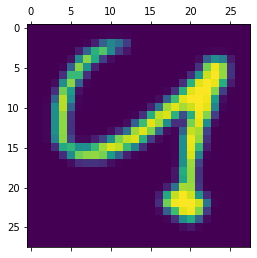

2


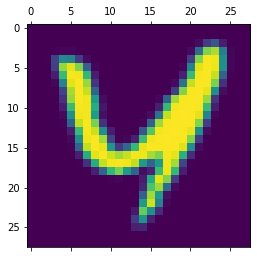

2


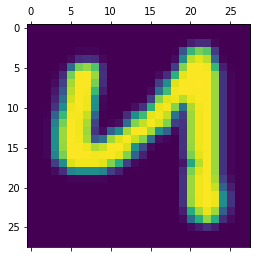

2


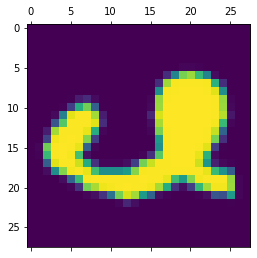

2


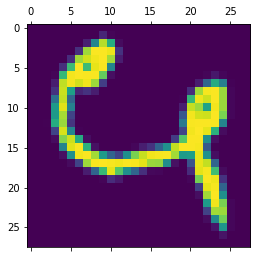

2


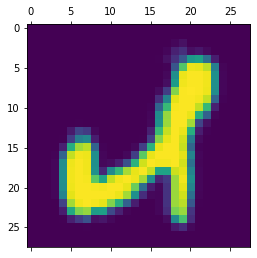

2


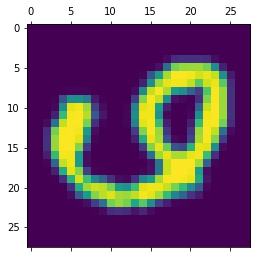

2


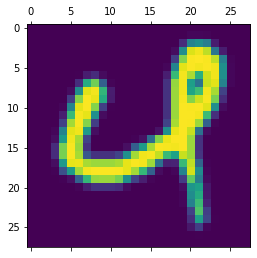

2


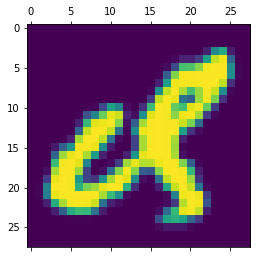

2


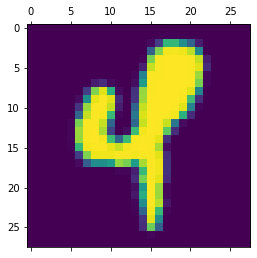

2


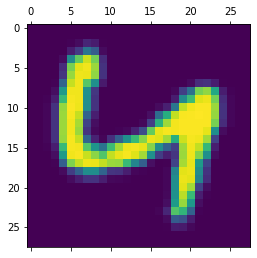

2


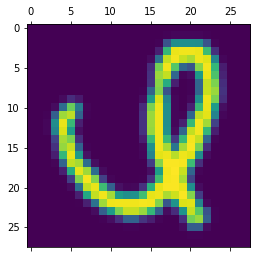

2


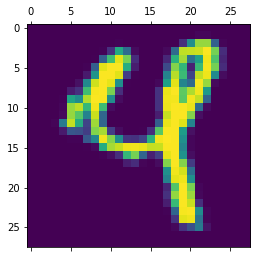

2


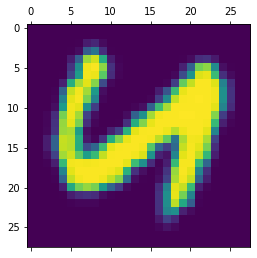

2


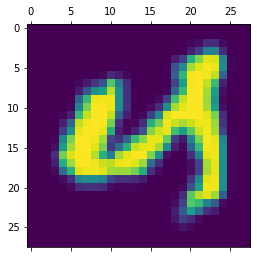

2


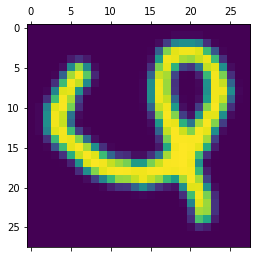

2


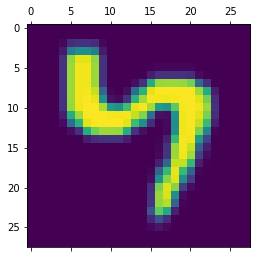

2


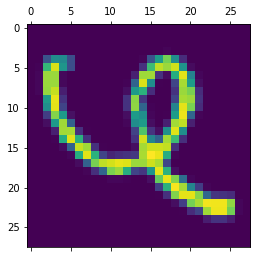

2


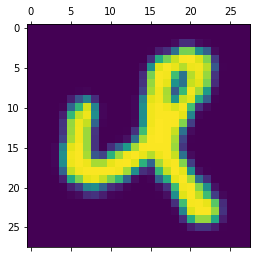

2


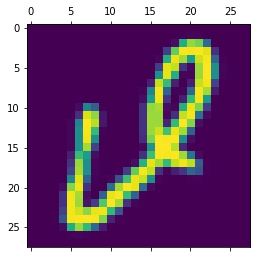

2


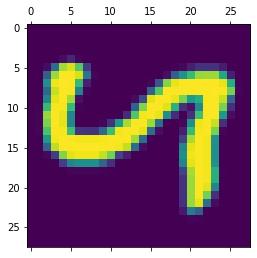

2


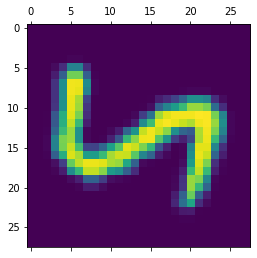

2


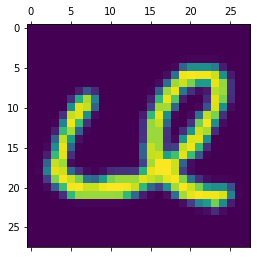

2


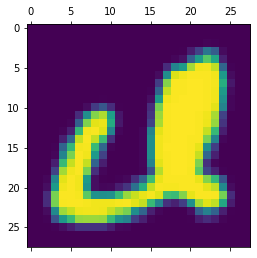

2


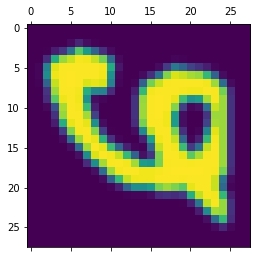

2


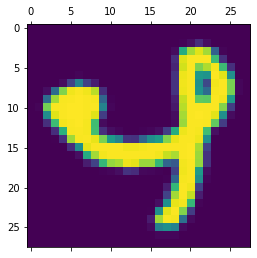

2


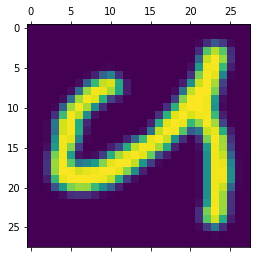

2


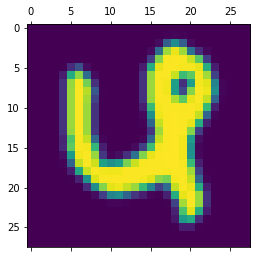

2


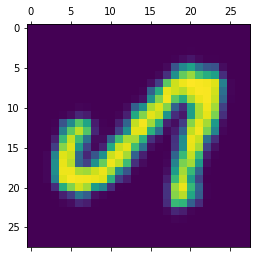

2


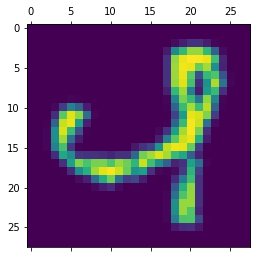

2


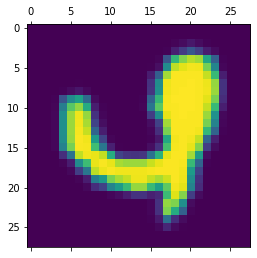

2


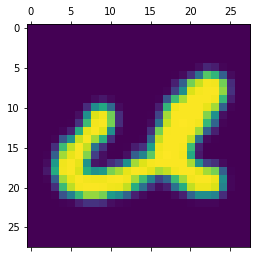

2


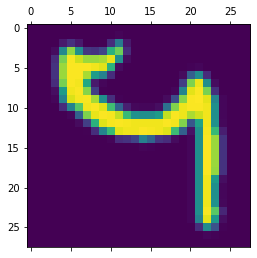

2


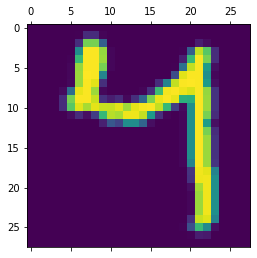

2


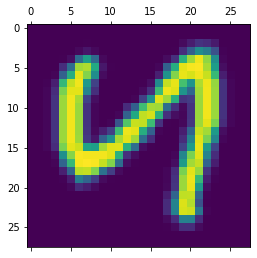

2


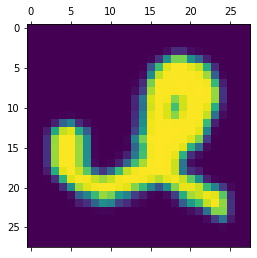

2


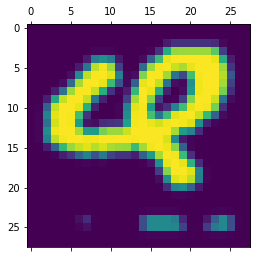

2


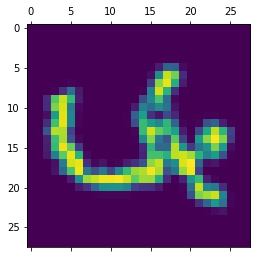

2


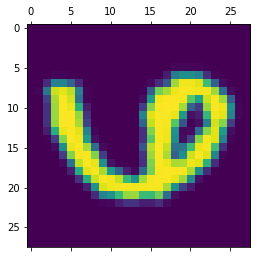

2


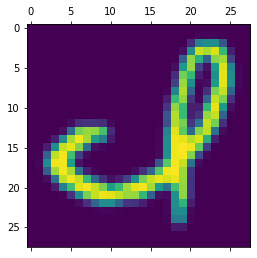

2


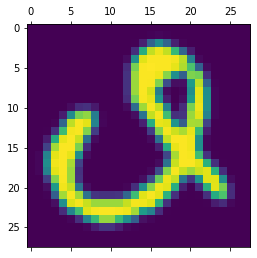

2


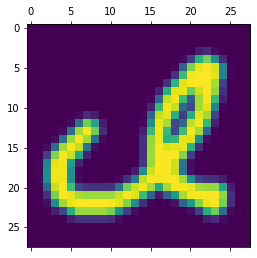

2


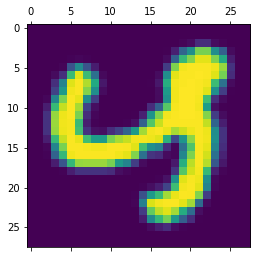

2


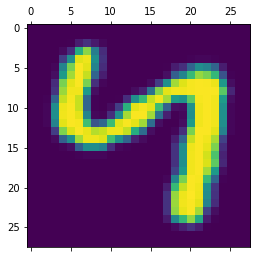

2


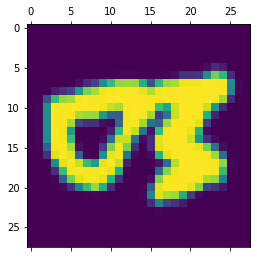

2


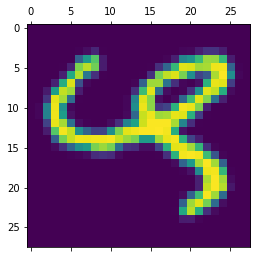

2


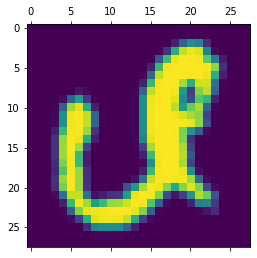

2


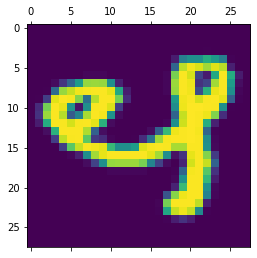

2


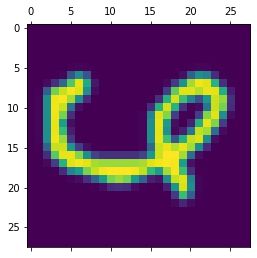

2


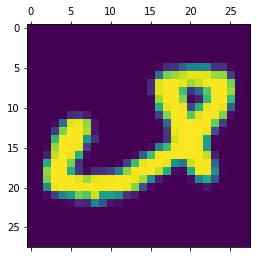

2


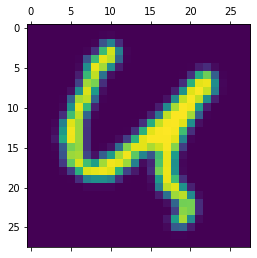

2


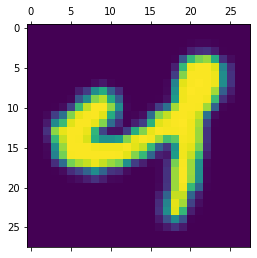

2


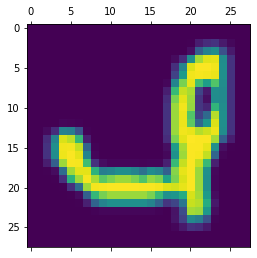

2


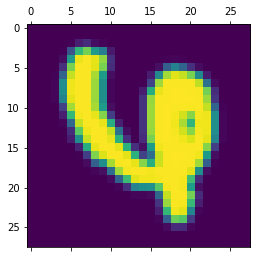

2


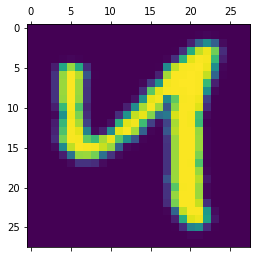

2


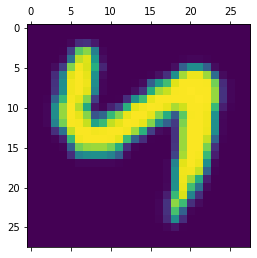

2


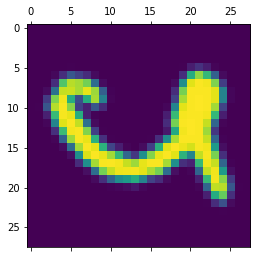

2


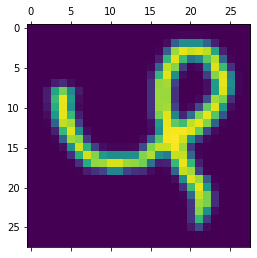

2


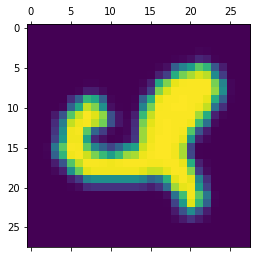

2


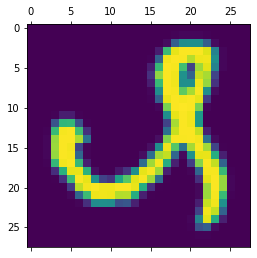

2


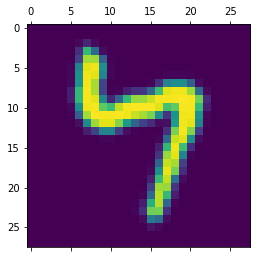

2


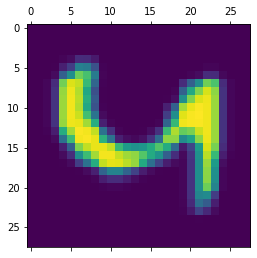

2


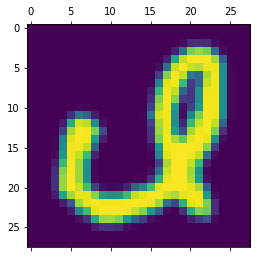

2


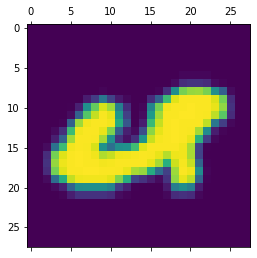

2


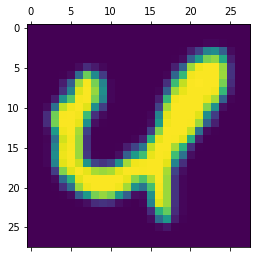

2


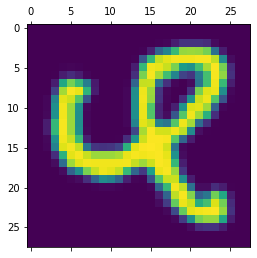

2


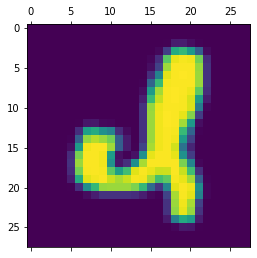

2


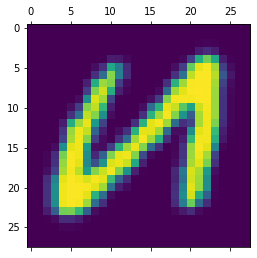

2


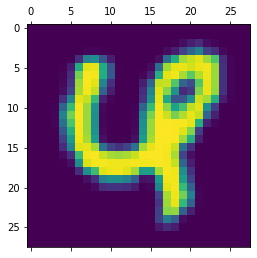

2


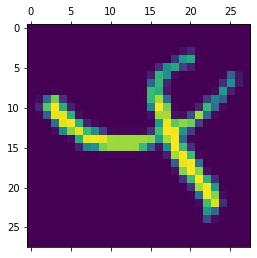

2


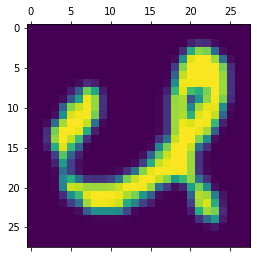

2


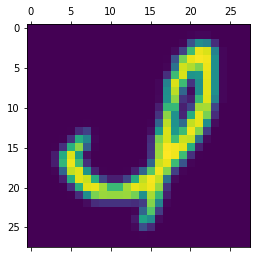

2


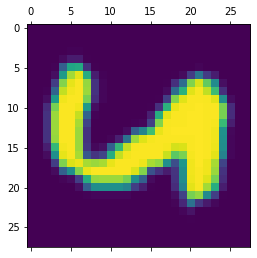

2


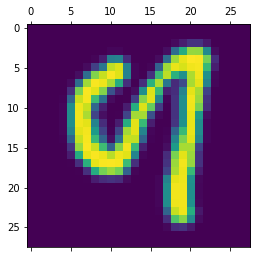

2


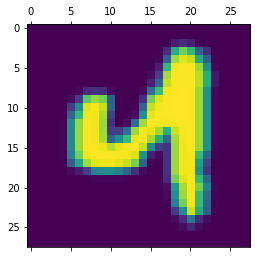

2


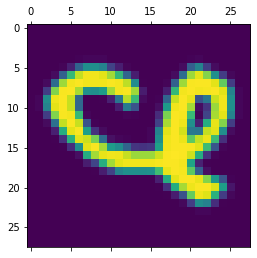

2


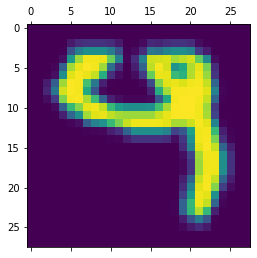

2


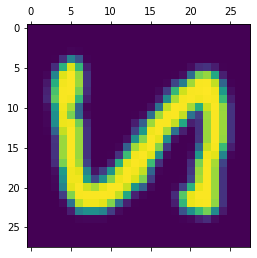

2


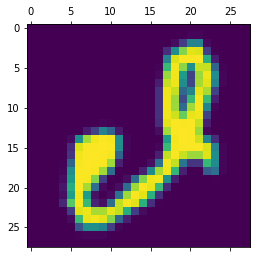

2


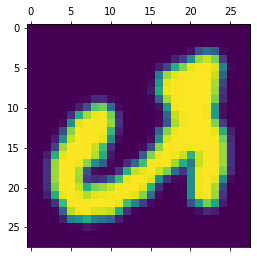

2


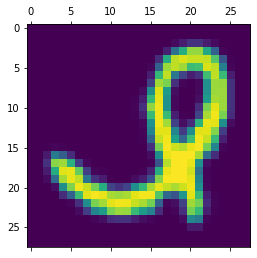

2


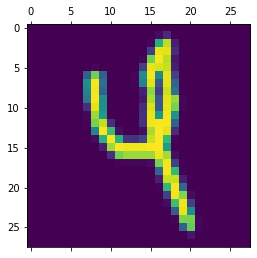

2


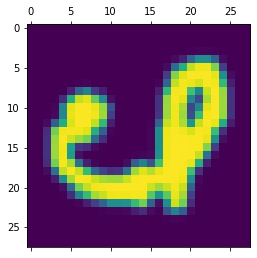

2


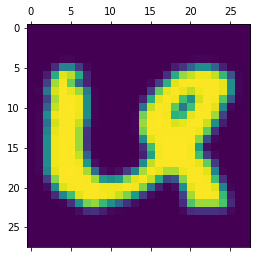

2


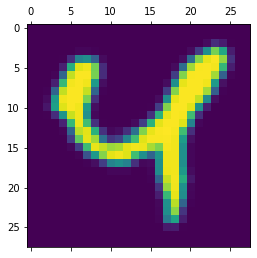

2


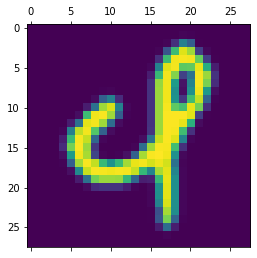

2


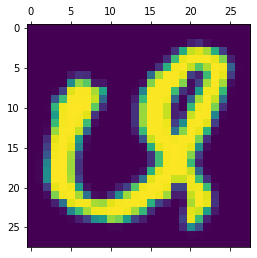

2


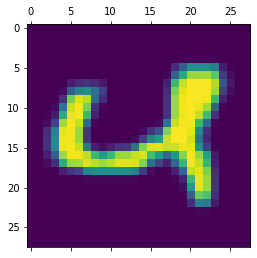

2


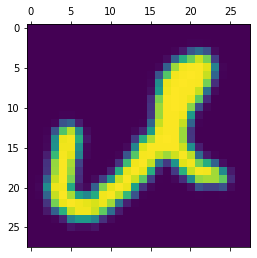

2


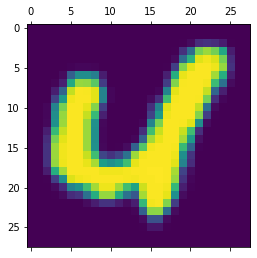

2


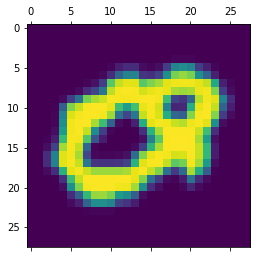

2


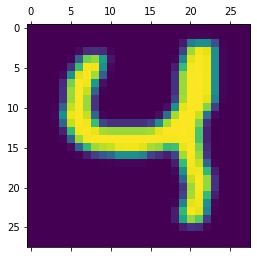

2


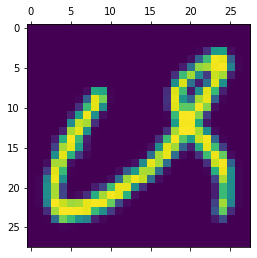

2


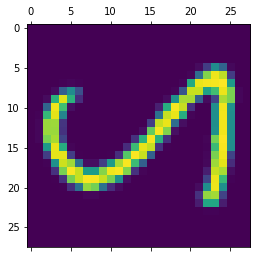

2


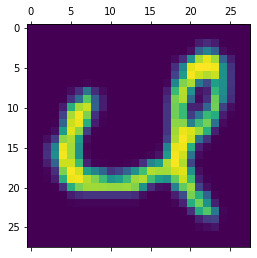

In [36]:
for i in range(len(X_test)):
    if y_test[i] == 2:
        print(y_test[i])
        plt.matshow(X_test[i].reshape([28,28]))
        plt.show()